# Home Credit Default Risk
GCI Competition Main notebook

Github Repo: https://github.com/kirisame-ame/GCI-Competition

Objective: To predict the probability of default based on customer data.

Evaluation index: Area Under the Curve (AUC)

## 0. Loading libraries and the data

Let's load basic libraries.
Other required libraries will be loaded when we explain them.
- numpy: Library for efficient numerical computation
- pandas: Library useful for data analysis
- matplotlib: Graph drawing library
- seaborn: Graph drawing library as well

In [2]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1]:
import os
from pathlib import Path

# Automatically get the current working directory
current_dir = Path(os.getcwd())

# Define file paths using pathlib
train_file = current_dir / "input" / "train.csv"
test_file = current_dir / "input" / "test.csv"
sample_sub_file = current_dir / "input" / "sample_submission.csv"

# Load data
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
sample_sub = pd.read_csv(sample_sub_file)

NameError: name 'pd' is not defined

## 1. Data visualization and analysis

### 1.1 Data Overview
Before conducting a full-scale analysis, we will first review a brief overview of the data.

In [4]:
# Check train data
print(f"train shape: {train.shape}")
train.head(3)

train shape: (171202, 34)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,0,Cash loans,F,0,112500.0,755190.0,36328.5,675000.0,Working,Higher education,...,School,NaN,0.372591,NaN,-292.0,NaN,NaN,NaN,NaN,0
1,1,Cash loans,F,0,225000.0,585000.0,16893.0,585000.0,Pensioner,Secondary / secondary special,...,XNA,NaN,0.449567,0.553165,-617.0,0.0,0.0,0.0,1.0,0
2,2,Cash loans,F,0,54000.0,334152.0,18256.5,270000.0,State servant,Secondary / secondary special,...,Postal,NaN,0.569503,NaN,-542.0,NaN,NaN,NaN,NaN,0


In [5]:
# Check test data
print(f"test shape: {test.shape}")
test.head(3)

test shape: (61500, 33)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,171202,Cash loans,F,1,144000.0,961146.0,28233.0,688500.0,Working,Higher education,...,2,Kindergarten,NaN,0.720416,NaN,-1.0,NaN,NaN,NaN,NaN
1,171203,Cash loans,F,0,103500.0,296280.0,16069.5,225000.0,Working,Secondary / secondary special,...,2,School,NaN,0.287306,NaN,-212.0,NaN,NaN,NaN,NaN
2,171204,Cash loans,F,1,180000.0,183694.5,11236.5,139500.0,Commercial associate,Secondary / secondary special,...,3,Trade: type 7,NaN,0.352456,0.389339,-428.0,0.0,1.0,1.0,1.0


### 1.2 Visualization and analysis(EDA)


#### 1.2.1 Checking missing values


In [6]:
# Check missing values of train data
train.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   112992
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
ORGANIZATION_TYPE                  0
EXT_SOURCE_1                  118928
EXT_SOURCE_2                     369
E

In [7]:
# Check missing values of test data
test.isnull().sum()

SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                   40909
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
ORGANIZATION_TYPE                 0
EXT_SOURCE_1                  42912
EXT_SOURCE_2                    130
EXT_SOURCE_3                

#### 1.2.2 Visualization and analysis of each feature
In this section, each feature is visualized and analyzed to see what kind of characteristics it has.

##### Target

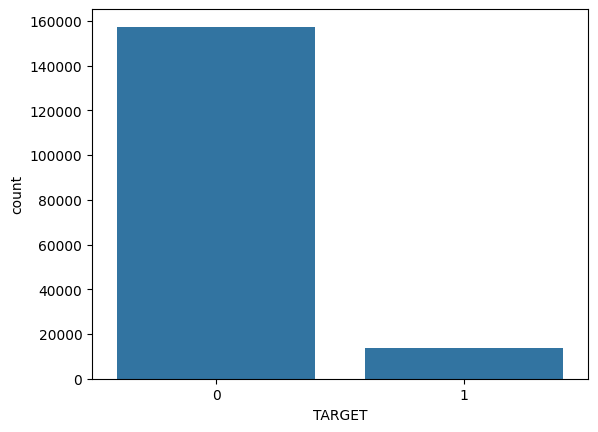

In [8]:
# The distribution of the target (default or not)
sns.countplot(data=train, x="TARGET")
plt.show()

we will encode gender and drop XNA's

##### NAME_CONTRACT_TYPE

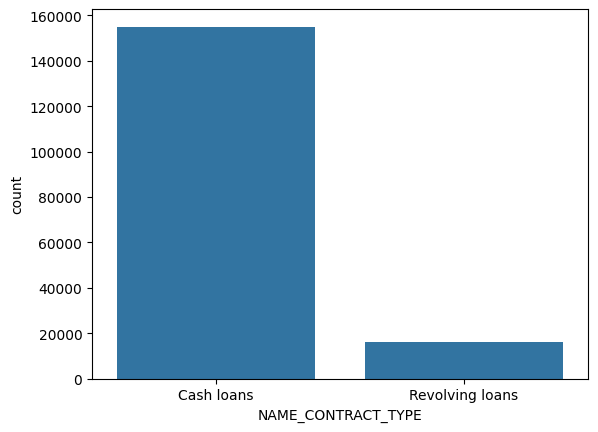

In [9]:
# The distribution of NAME_CONTRACT_TYPE
sns.countplot(data=train, x="NAME_CONTRACT_TYPE")
plt.show()

##### CODE_GENDER

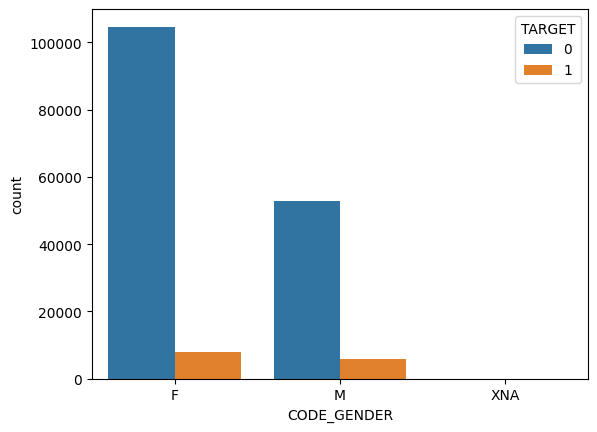

In [10]:
sns.countplot(data=train,x="CODE_GENDER",hue="TARGET")
plt.show()

In [11]:
train["CODE_GENDER"].value_counts()

CODE_GENDER
F      112549
M       58649
XNA         4
Name: count, dtype: int64

In [12]:
test["CODE_GENDER"].value_counts()

CODE_GENDER
F    39916
M    21584
Name: count, dtype: int64

we will drop XNA

##### CNT_CHILDREN

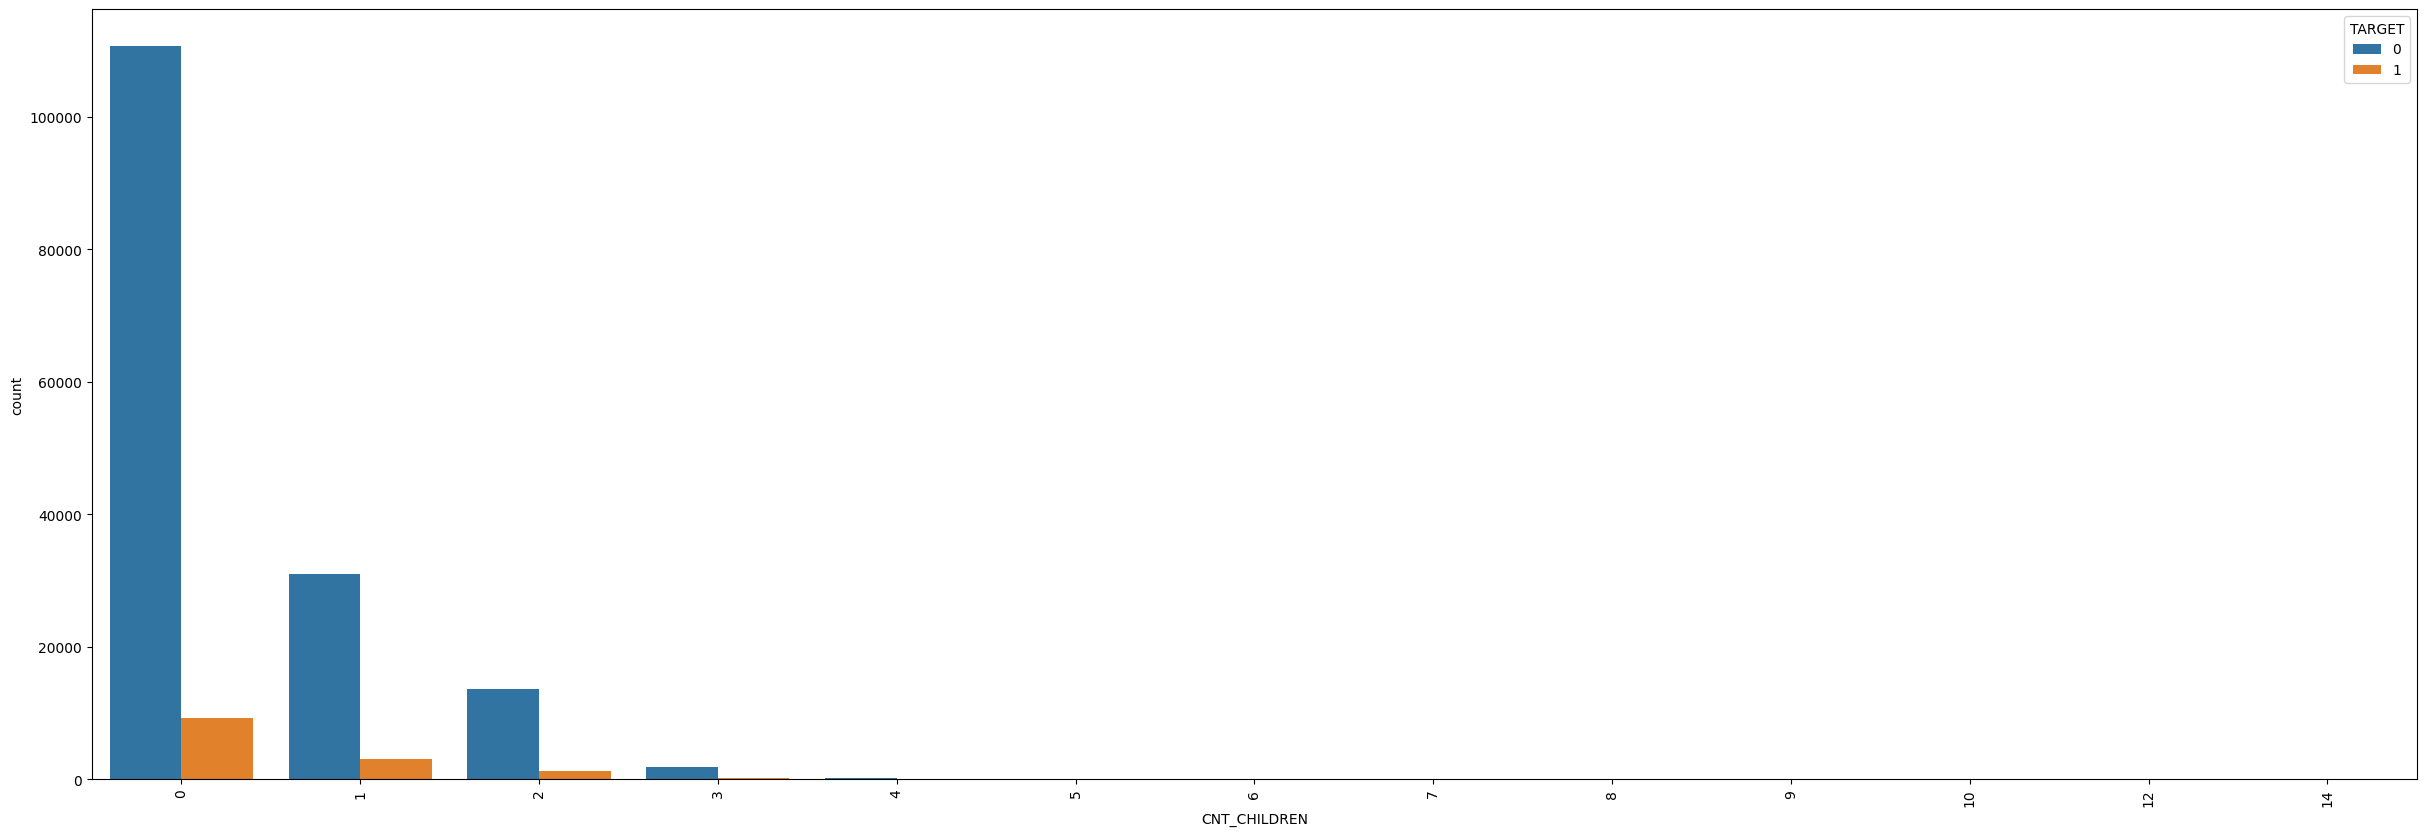

In [13]:
# The distribution of CNT_CHILDREN
plt.figure(figsize=(30, 10))
sns.countplot(data=train, x="CNT_CHILDREN",hue="TARGET")
plt.tick_params(axis="x", rotation=90)
plt.show()

binning 3>= is a possibility

##### AMT_INCOME_TOTAL

AMT_INCOME_TOTAL does not graph well when visualized as usual. In such cases, the cause may be the presence of a small number of outliers that take large values. If you wish to visualize data like this, a logarithmic transformation can be performed to successfully display the graph.

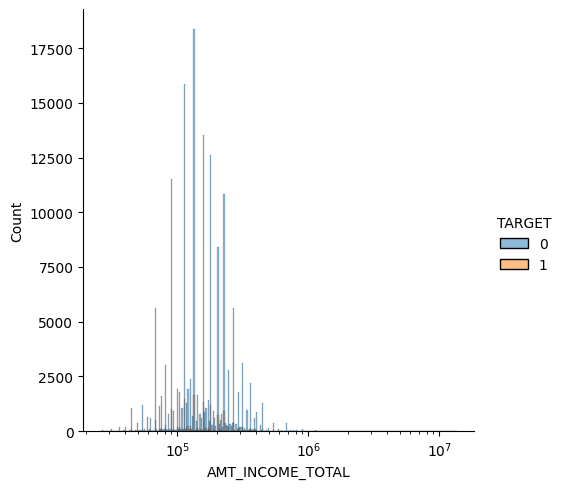

In [14]:
# The distribution of AMT_INCOME_TOTAL（Logarithmic transformation）
sns.displot(data=train, x="AMT_INCOME_TOTAL", log_scale=10,hue="TARGET")
plt.show()

We displayed the graph successfully by using logarithmic transformation.
The income is supposed to be a continuous value, but it looks like a discrete value. Let's have a look at the type of AMT_INCOME_TOTAL values.

In [15]:
# Check the type of AMT_INCOME_TOTAL values
len(train["AMT_INCOME_TOTAL"].unique())

1641

There are 171202 data in train, but AMT_INCOME_TOTAL consists of only 1641 different values. Let's check the top 10 values specifically.

In [16]:
# Top 10 values of AMT_INCOME_TOTAL
train["AMT_INCOME_TOTAL"].value_counts().head(10)

AMT_INCOME_TOTAL
135000.0    19969
112500.0    17320
157500.0    14772
180000.0    13791
90000.0     12481
225000.0    11573
202500.0     9128
67500.0      6130
270000.0     6006
81000.0      3295
Name: count, dtype: int64

It appears that AMT_INCOME_TOTAL is not an exact annual income, but rather data compiled from a rounded number.

##### AMT_CREDIT

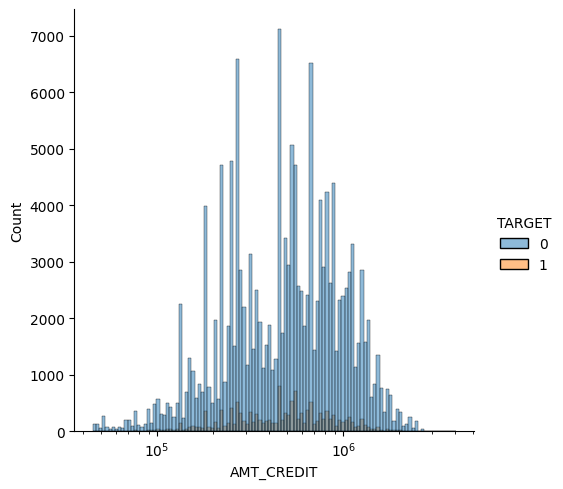

In [17]:
# The distribution of AMT_CREDIT（Logarithmic transformation）
sns.displot(data=train, x="AMT_CREDIT", log_scale=10,hue="TARGET")
plt.show()

##### AMT_ANNUITY

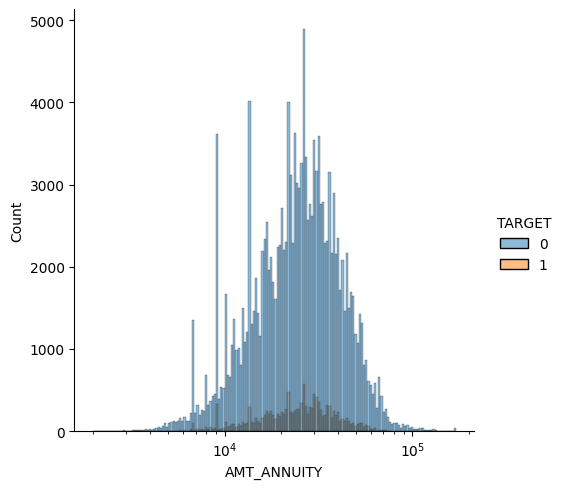

In [18]:
# The distribution of AMT_ANNUITY
sns.displot(data=train, x="AMT_ANNUITY", log_scale=10,hue="TARGET")
plt.show()

##### AMT_GOODS_PRICE

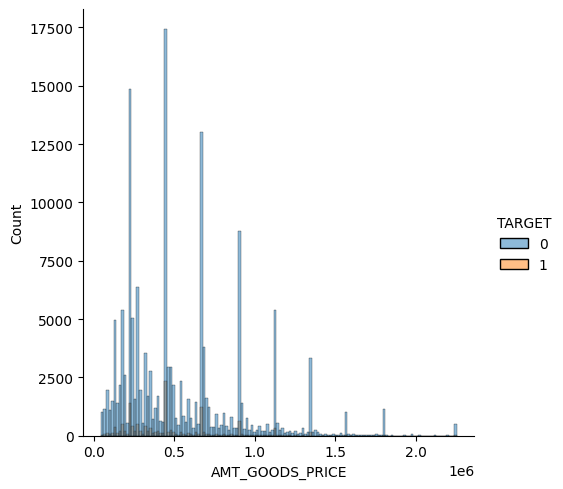

In [19]:
# The distribution of AMT_GOODS_PRICE
sns.displot(data=train, x="AMT_GOODS_PRICE",hue="TARGET")
plt.show()

##### NAME_INCOME_TYPE

In [20]:
train["NAME_INCOME_TYPE"].value_counts()

NAME_INCOME_TYPE
Working                 88268
Commercial associate    40007
Pensioner               30895
State servant           12007
Unemployed                 10
Student                     9
Businessman                 3
Maternity leave             3
Name: count, dtype: int64

binning the less frequent categories could be done

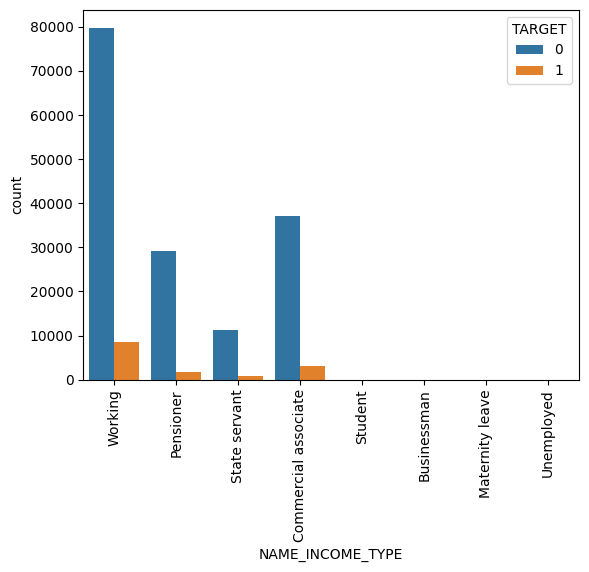

In [21]:
sns.countplot(data=train, x="NAME_INCOME_TYPE",hue="TARGET")
plt.tick_params(axis="x", rotation=90)

##### NAME_EDUCATION_TYPE

NAME_EDUCATION_TYPE
Secondary / secondary special    121612
Higher education                  41645
Incomplete higher                  5711
Lower secondary                    2133
Academic degree                     101
Name: count, dtype: int64


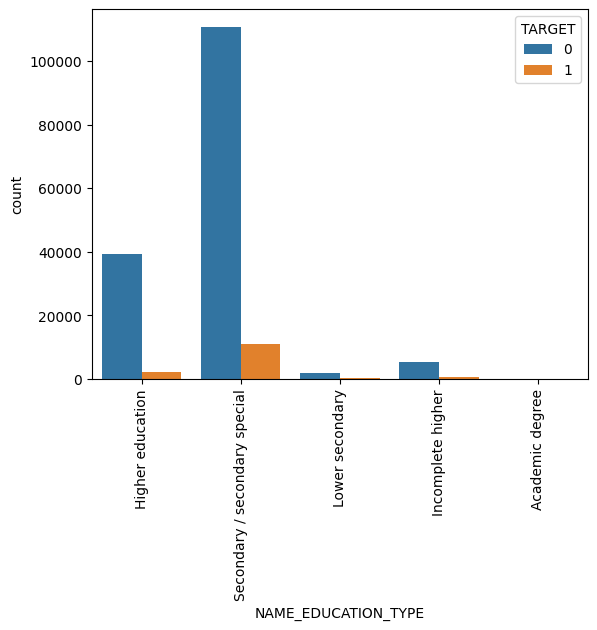

In [22]:
print(train["NAME_EDUCATION_TYPE"].value_counts())
sns.countplot(data=train, x="NAME_EDUCATION_TYPE",hue="TARGET")
plt.tick_params(axis="x", rotation=90)

##### NAME_FAMILY_STATUS

NAME_FAMILY_STATUS
Married                 109323
Single / not married     25285
Civil marriage           16652
Separated                10988
Widow                     8952
Unknown                      2
Name: count, dtype: int64


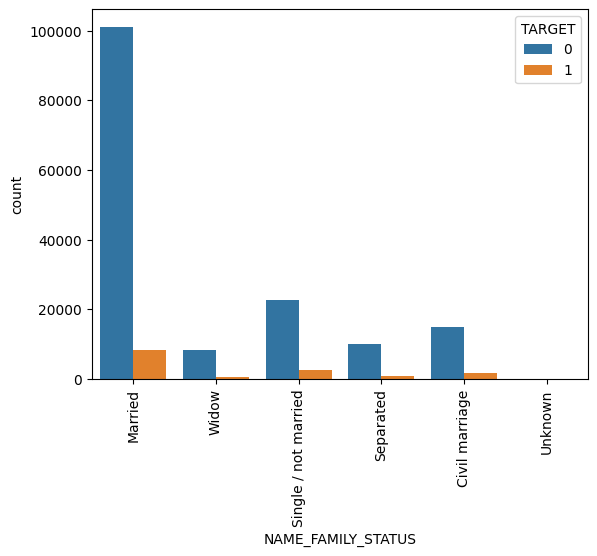

In [23]:
print(train["NAME_FAMILY_STATUS"].value_counts())
sns.countplot(data=train, x="NAME_FAMILY_STATUS",hue="TARGET")
plt.tick_params(axis="x", rotation=90)

In [24]:
test["NAME_FAMILY_STATUS"].value_counts()

NAME_FAMILY_STATUS
Married                 38946
Single / not married     9334
Civil marriage           6098
Separated                4008
Widow                    3114
Name: count, dtype: int64

we will drop unknown

##### NAME_HOUSING_TYPE

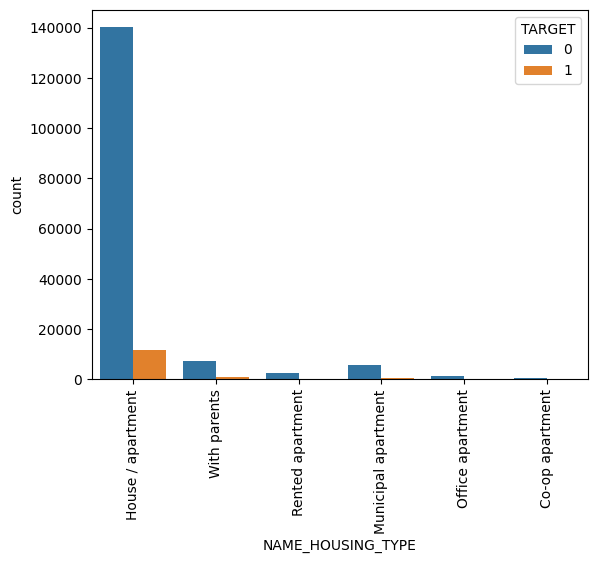

In [25]:
sns.countplot(data=train, x="NAME_HOUSING_TYPE",hue="TARGET")
plt.tick_params(axis="x", rotation=90)

##### REGION_POPULATION_RELATIVE

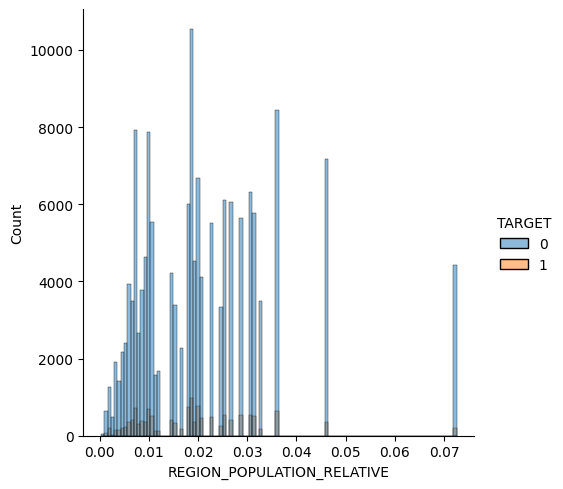

In [26]:
# The distribution of REGION_POPULATION_RELATIVE
sns.displot(data=train, x="REGION_POPULATION_RELATIVE",hue="TARGET")
plt.show()

we are going to assume every region has a different value so we can treat this feature as an Id

##### DAYS_BIRTH
We won't need to visualize this one. We will process it later to calculate age

##### DAYS_EMPLOYED

a quick peek at the values show that there are both negative and positive numbers, perhaps the positive numbers could mean unemployed. Let's check

In [27]:
print("Positive values: ",train[train["DAYS_EMPLOYED"]>=0].shape[0])
print("Pensioner + Unemployed: ",train[(train["NAME_INCOME_TYPE"] == "Pensioner" )| (train["NAME_INCOME_TYPE"]=="Unemployed")].shape[0])

Positive values:  30898
Pensioner + Unemployed:  30905


the number's close enough, so we will bin positive numbers to 0 and the rest we will change into year

##### DAYS_REGISTRATION

we won't need to visualize this one, we will just transform it into years

##### DAYS_ID_PUBLISH

we won't need to visualize this one, we will just transform it into years


##### OWN_CAR_AGE

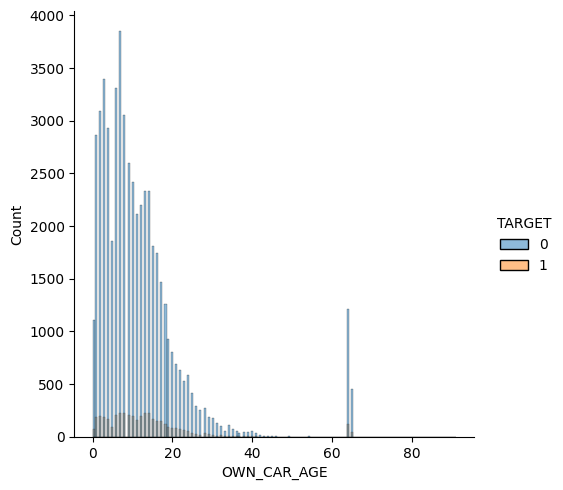

In [28]:
# The distribution of OWN_CAR_AGE
sns.displot(data=train, x="OWN_CAR_AGE",hue="TARGET")
plt.show()

the outliers around 60++ will be changed to 3*std+mean to keep the normal distribution

##### FLAG_MOBIL

In [29]:
train["FLAG_MOBIL"].value_counts()

FLAG_MOBIL
1    171201
0         1
Name: count, dtype: int64

<Axes: xlabel='FLAG_MOBIL', ylabel='count'>

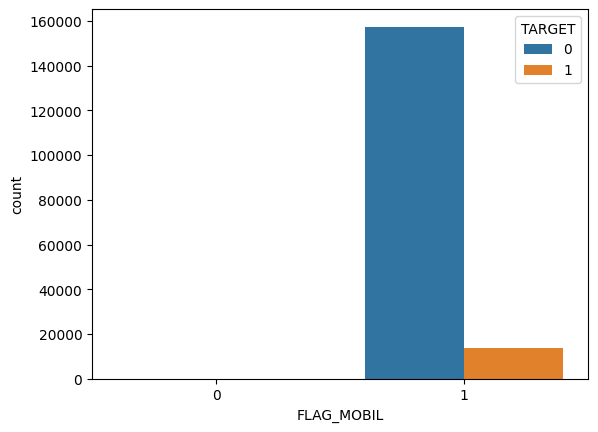

In [30]:
sns.countplot(data=train, x="FLAG_MOBIL",hue="TARGET")

since basically everything is 1 we will drop this column

##### FLAG_EMP_PHONE

In [31]:
train["FLAG_EMP_PHONE"].value_counts()

FLAG_EMP_PHONE
1    140299
0     30903
Name: count, dtype: int64

values almost the same with unemployed people (i.e. pensioner+unemployed), so it will be dropped

##### FLAG_WORK_PHONE

In [32]:
train["FLAG_WORK_PHONE"].value_counts()

FLAG_WORK_PHONE
0    137009
1     34193
Name: count, dtype: int64

<Axes: xlabel='FLAG_WORK_PHONE', ylabel='count'>

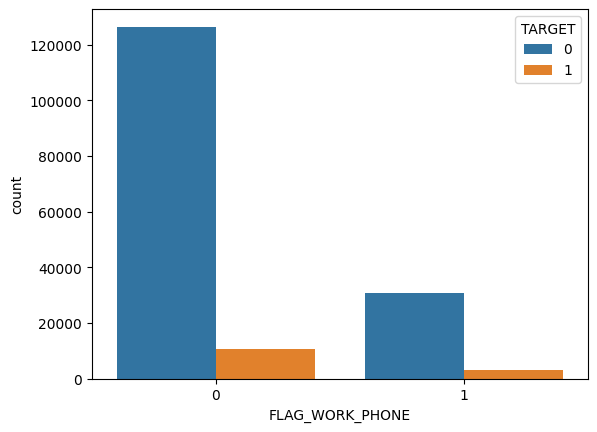

In [33]:
sns.countplot(data=train, x="FLAG_WORK_PHONE",hue="TARGET")

##### OCCUPATION_TYPE

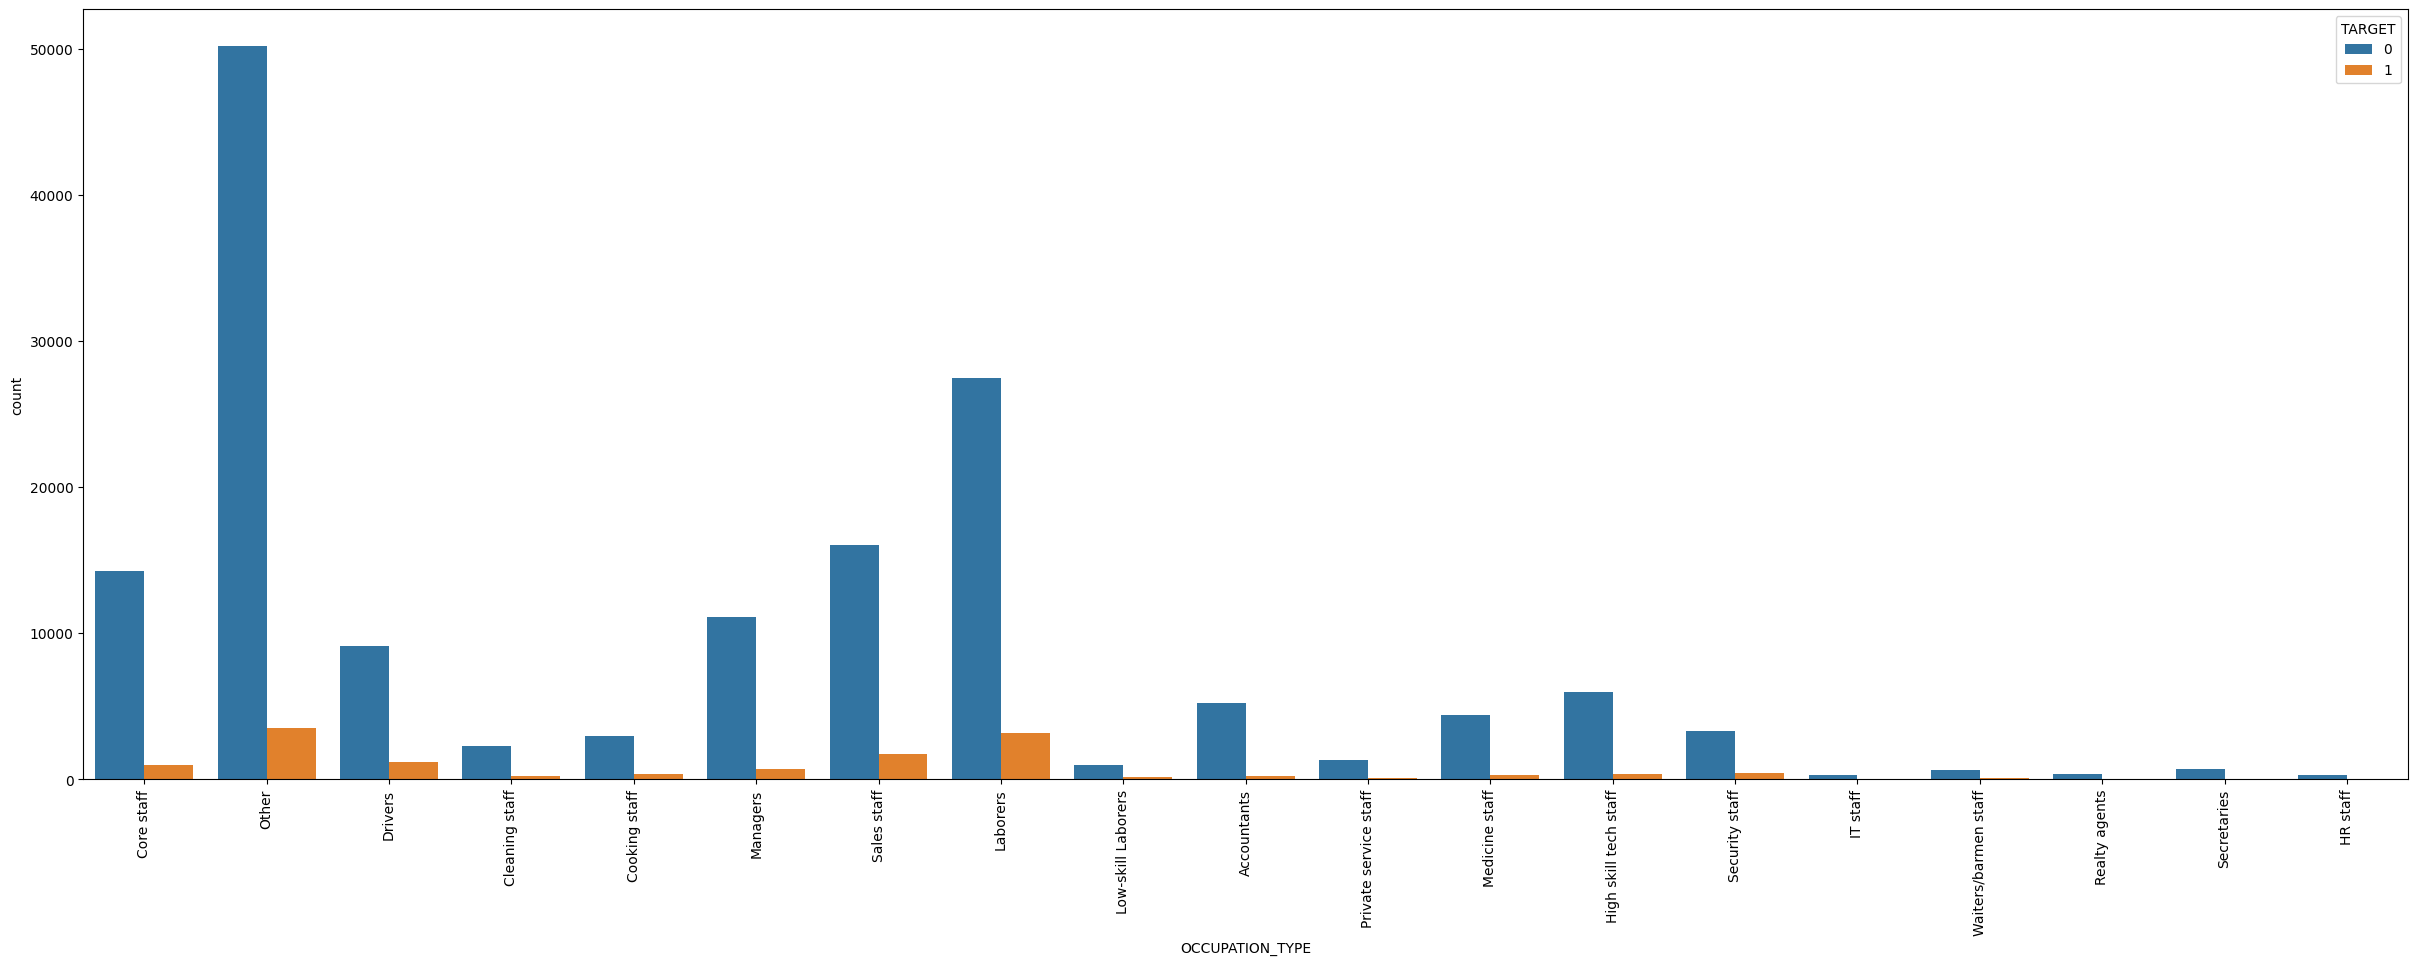

In [34]:
plt.figure(figsize=(30, 10))
sns.countplot(data=train, x="OCCUPATION_TYPE",hue="TARGET")
plt.tick_params(axis="x", rotation=90)
plt.show()

##### CNT_FAM_MEMBERS

In [35]:
train["CNT_FAM_MEMBERS"].value_counts()

CNT_FAM_MEMBERS
2.0     88165
1.0     37766
3.0     29284
4.0     13801
5.0      1903
6.0       220
7.0        36
8.0        13
9.0         4
12.0        2
10.0        2
11.0        1
14.0        1
15.0        1
16.0        1
Name: count, dtype: int64

<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='count'>

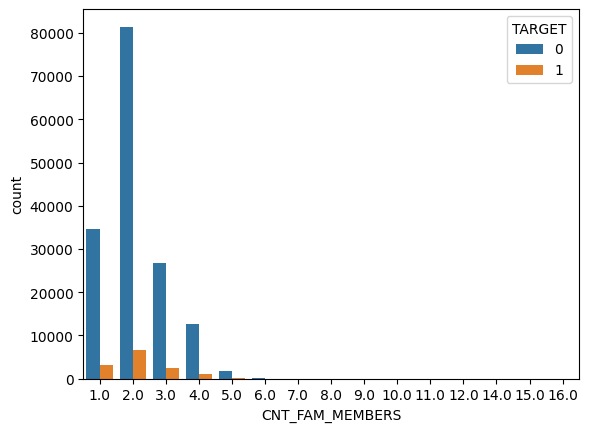

In [36]:
sns.countplot(data=train, x="CNT_FAM_MEMBERS",hue="TARGET")

we will bin 8 and above to be 8

##### REGION_RATING_CLIENT

<Axes: xlabel='REGION_RATING_CLIENT', ylabel='count'>

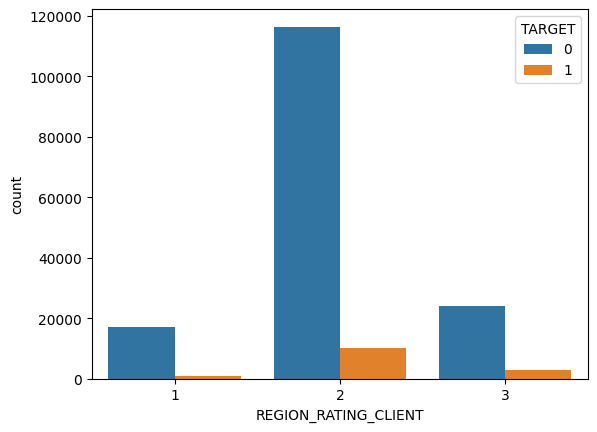

In [37]:
sns.countplot(data=train, x="REGION_RATING_CLIENT",hue="TARGET")

##### ORGANIZATION_TYPE

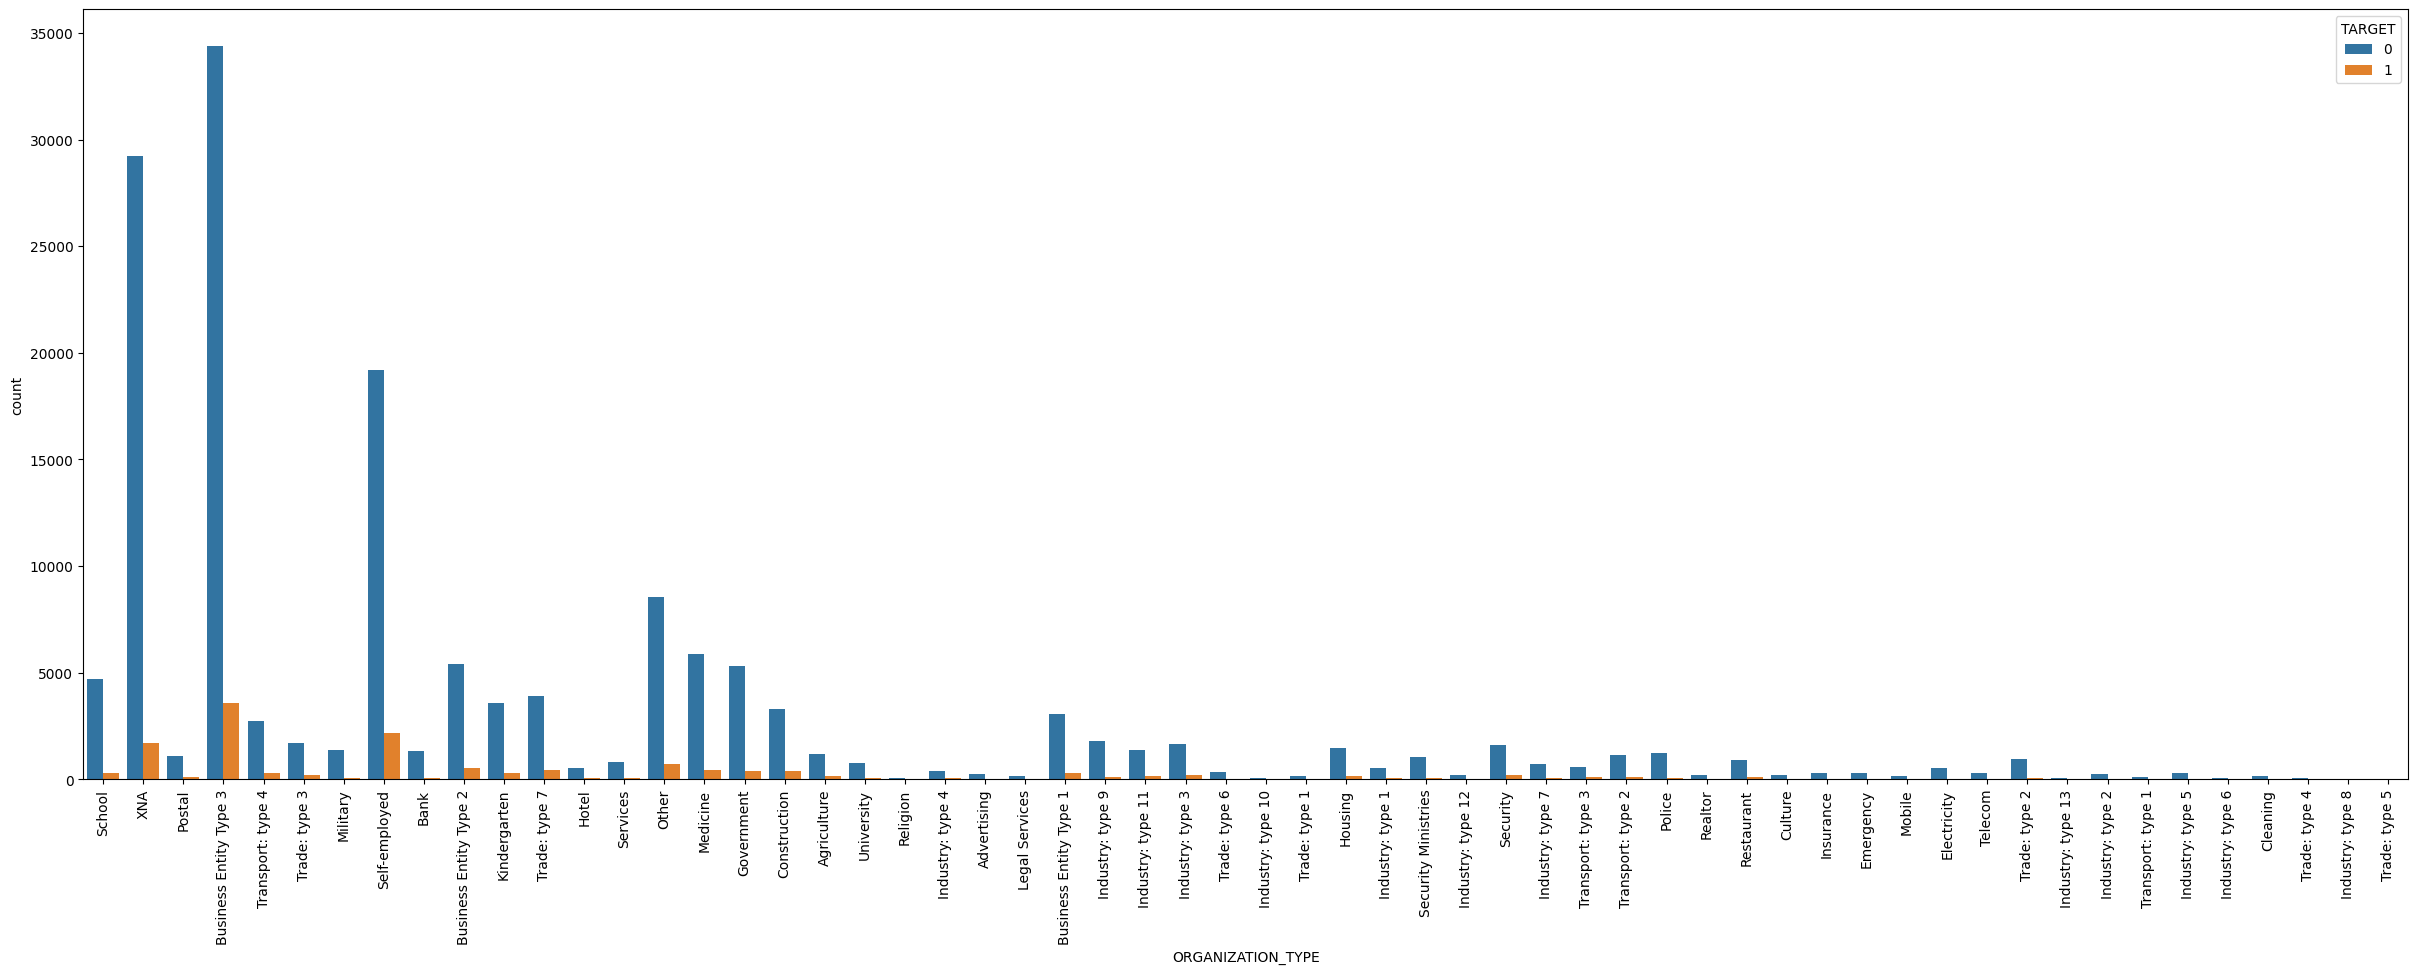

In [38]:
# The distribution of ORGANIZATION_TYPE
plt.figure(figsize=(30, 10))
sns.countplot(data=train, x="ORGANIZATION_TYPE",hue="TARGET")
plt.tick_params(axis="x", rotation=90)
plt.show()

from the categories it seems like a binning of the same field can be done

##### EXT_SOURCE_1

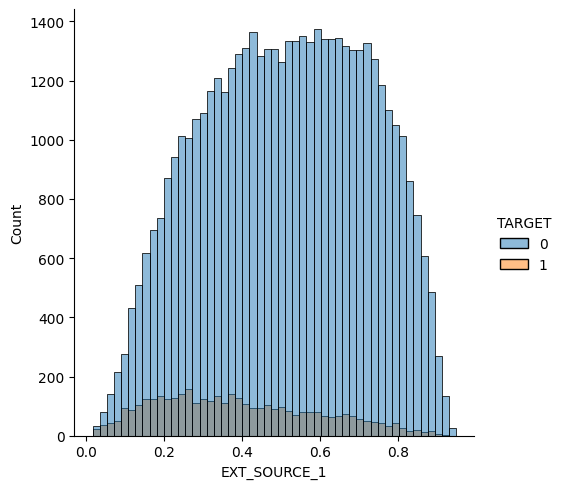

In [39]:
# The distribution of EXT_SOURCE_1
sns.displot(data=train, x="EXT_SOURCE_1",hue="TARGET")
plt.show()

In [123]:
train["EXT_SOURCE_1"].isna().sum()

118928

In [137]:
test["EXT_SOURCE_1"].isna().sum()

42912

that's a lot of missing values, we will try to impute it by aggregating the most correlated feature

In [201]:
for i in train.select_dtypes(include=[np.number]).columns:
    print("Correlation between EXT_SOURCE_1 and ",i,": ",train["EXT_SOURCE_1"].corr(train[i]))

Correlation between EXT_SOURCE_1 and  SK_ID_CURR :  0.003742193965430563
Correlation between EXT_SOURCE_1 and  CNT_CHILDREN :  -0.13828304126172872
Correlation between EXT_SOURCE_1 and  AMT_INCOME_TOTAL :  0.07494379491214352
Correlation between EXT_SOURCE_1 and  AMT_CREDIT :  0.1662831309466717
Correlation between EXT_SOURCE_1 and  AMT_ANNUITY :  0.11604518991018971
Correlation between EXT_SOURCE_1 and  AMT_GOODS_PRICE :  0.17352604658373058
Correlation between EXT_SOURCE_1 and  REGION_POPULATION_RELATIVE :  0.09847109329582356
Correlation between EXT_SOURCE_1 and  DAYS_BIRTH :  -0.5985634750887168
Correlation between EXT_SOURCE_1 and  DAYS_EMPLOYED :  0.2861057692456394
Correlation between EXT_SOURCE_1 and  DAYS_REGISTRATION :  -0.18288465043039615
Correlation between EXT_SOURCE_1 and  DAYS_ID_PUBLISH :  -0.12867249739658607
Correlation between EXT_SOURCE_1 and  OWN_CAR_AGE :  -0.08276103521091675
Correlation between EXT_SOURCE_1 and  FLAG_MOBIL :  nan
Correlation between EXT_SOURCE_

since it is strongly correlated with DAYS_BIRTH, we will impute it by mean grouped by age

##### EXT_SOURCE_2

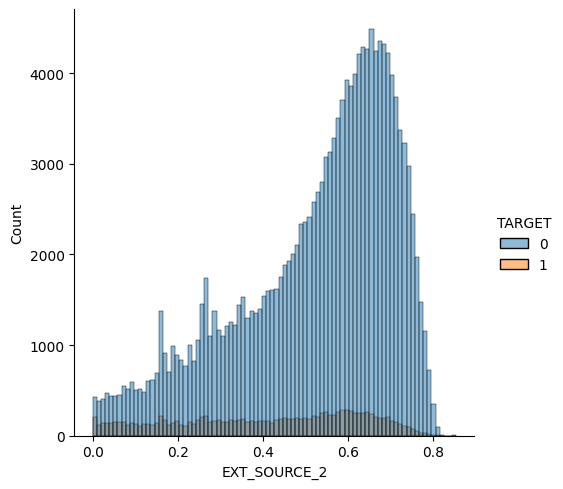

In [40]:
# The distribution of EXT_SOURCE_2
sns.displot(data=train, x="EXT_SOURCE_2",hue="TARGET")
plt.show()

In [122]:
train["EXT_SOURCE_2"].isna().sum()

369

In [211]:
test["EXT_SOURCE_2"].isna().sum()

130

since the missing values are not a lot we could just impute by its mean

##### EXT_SOURCE_3


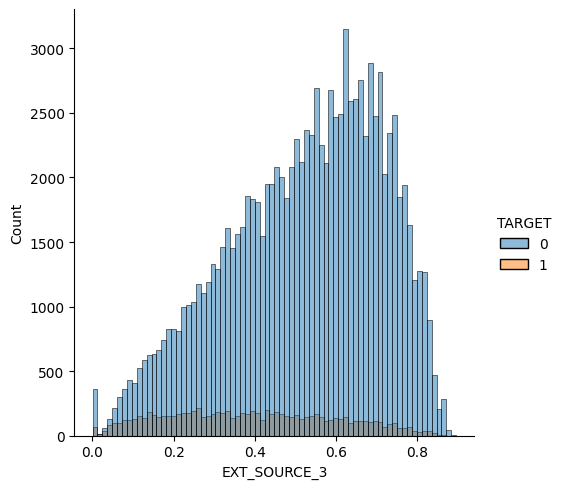

In [41]:
# The distribution of EXT_SOURCE_3
sns.displot(data=train, x="EXT_SOURCE_3",hue="TARGET")
plt.show()

In [124]:
train["EXT_SOURCE_3"].isna().sum()

54586

In [138]:
test["EXT_SOURCE_3"].isna().sum()

19690

that's a lot of missing values, let's try to find a correlated feature like before

In [214]:
for i in train.select_dtypes(include=[np.number]).columns:
    print("Correlation between EXT_SOURCE_3 and ",i,": ",train["EXT_SOURCE_3"].corr(train[i]))

Correlation between EXT_SOURCE_3 and  SK_ID_CURR :  -0.0008096692107867606
Correlation between EXT_SOURCE_3 and  CNT_CHILDREN :  -0.04025655253353616
Correlation between EXT_SOURCE_3 and  AMT_INCOME_TOTAL :  -0.06511696195946387
Correlation between EXT_SOURCE_3 and  AMT_CREDIT :  0.04323557364270469
Correlation between EXT_SOURCE_3 and  AMT_ANNUITY :  0.028482729627078436
Correlation between EXT_SOURCE_3 and  AMT_GOODS_PRICE :  0.04722109364859818
Correlation between EXT_SOURCE_3 and  REGION_POPULATION_RELATIVE :  -0.006909092808151079
Correlation between EXT_SOURCE_3 and  DAYS_BIRTH :  -0.20794750557342984
Correlation between EXT_SOURCE_3 and  DAYS_EMPLOYED :  0.11688261362426691
Correlation between EXT_SOURCE_3 and  DAYS_REGISTRATION :  -0.10742182727849815
Correlation between EXT_SOURCE_3 and  DAYS_ID_PUBLISH :  -0.1316823674473917
Correlation between EXT_SOURCE_3 and  OWN_CAR_AGE :  -0.014195812533016565
Correlation between EXT_SOURCE_3 and  FLAG_MOBIL :  nan
Correlation between EX

this feature is not really strongly correlated to anything so a safe option is to impute its mean

##### EXT_SOURCE Correlations
let's calculate the corr scores between ext_sources to ensure they could be useful

In [42]:
for i in ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]:
    for j in ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]:
        if i != j:
            print(f"Correlation between {i} and {j}: {train[[i, j]].corr().iloc[0, 1]}")

Correlation between EXT_SOURCE_1 and EXT_SOURCE_2: 0.21344587477440544
Correlation between EXT_SOURCE_1 and EXT_SOURCE_3: 0.1873243239063459
Correlation between EXT_SOURCE_2 and EXT_SOURCE_1: 0.21344587477440552
Correlation between EXT_SOURCE_2 and EXT_SOURCE_3: 0.10959492675500972
Correlation between EXT_SOURCE_3 and EXT_SOURCE_1: 0.18732432390634582
Correlation between EXT_SOURCE_3 and EXT_SOURCE_2: 0.10959492675500972


they are weakly correlated so it can be assumed that they are independent enough to be useful

##### DAYS_LAST_PHONE_CHANGE

we won't visualize this and will transform it into years

##### AMT_REQ_CREDIT_BUREAU_HOUR

In [43]:
target_rates = train.groupby('AMT_REQ_CREDIT_BUREAU_HOUR')['TARGET']
print(target_rates.count(), target_rates.mean())

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    147153
1.0       889
2.0        37
3.0         6
4.0         1
Name: TARGET, dtype: int64 AMT_REQ_CREDIT_BUREAU_HOUR
0.0    0.077110
1.0    0.080990
2.0    0.081081
3.0    0.000000
4.0    0.000000
Name: TARGET, dtype: float64


feature is not descriptive enough, will be dropped

##### AMT_REQ_CREDIT_BUREAU_MON


In [44]:
target_rates = train.groupby('AMT_REQ_CREDIT_BUREAU_MON')['TARGET']
print(target_rates.count()[:10], target_rates.mean()[:10])

AMT_REQ_CREDIT_BUREAU_MON
0.0     123733
1.0      18463
2.0       2961
3.0       1092
4.0        594
5.0        352
6.0        193
7.0        174
8.0        100
9.0        116
10.0        79
Name: TARGET, dtype: int64 AMT_REQ_CREDIT_BUREAU_MON
0.0     0.078047
1.0     0.076477
2.0     0.067545
3.0     0.054945
4.0     0.048822
5.0     0.065341
6.0     0.067358
7.0     0.057471
8.0     0.040000
9.0     0.034483
10.0    0.063291
Name: TARGET, dtype: float64


There seems to be a decline along with the increasing values so this will be used. Also missing values will be filled with 0, and values from 2 and above will be binned to 2

##### AMT_REQ_CREDIT_BUREAU_QRT

In [45]:
target_rate = train.groupby('AMT_REQ_CREDIT_BUREAU_QRT')['TARGET']
print(target_rate.count()[:10], target_rate.mean()[:10])

AMT_REQ_CREDIT_BUREAU_QRT
0.0    119813
1.0     18906
2.0      8077
3.0       961
4.0       267
5.0        38
6.0        17
7.0         3
8.0         2
Name: TARGET, dtype: int64 AMT_REQ_CREDIT_BUREAU_QRT
0.0    0.078514
1.0    0.066540
2.0    0.080475
3.0    0.068678
4.0    0.127341
5.0    0.078947
6.0    0.176471
7.0    0.000000
8.0    0.000000
Name: TARGET, dtype: float64


the target rate seems to jump around so this column will be dropped to reduce noise

##### AMT_REQ_CREDIT_BUREAU_YEAR

In [46]:
target_rate = train.groupby('AMT_REQ_CREDIT_BUREAU_YEAR')['TARGET']
print(target_rate.count(), target_rate.mean())

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     39868
1.0     35372
2.0     27869
3.0     18725
4.0     11591
5.0      6637
6.0      3990
7.0      2176
8.0      1153
9.0       619
10.0       12
11.0       23
12.0       17
13.0       10
14.0        7
15.0        5
16.0        2
17.0        2
18.0        3
19.0        2
20.0        1
21.0        1
23.0        1
Name: TARGET, dtype: int64 AMT_REQ_CREDIT_BUREAU_YEAR
0.0     0.071135
1.0     0.073222
2.0     0.082027
3.0     0.078131
4.0     0.084376
5.0     0.081211
6.0     0.088221
7.0     0.092831
8.0     0.087598
9.0     0.105008
10.0    0.166667
11.0    0.086957
12.0    0.117647
13.0    0.100000
14.0    0.285714
15.0    0.000000
16.0    0.500000
17.0    0.000000
18.0    0.000000
19.0    0.000000
20.0    0.000000
21.0    0.000000
23.0    0.000000
Name: TARGET, dtype: float64


there seems to be a steady increase in target rate along with the values so this will be used. Also values 9 and above will be binned as 9

## 2. Preprocessing and feature creation


In [3]:
preproc = train.copy()

### Gender

In [4]:
preproc.drop(preproc.loc[preproc['CODE_GENDER']=='XNA'].index, inplace=True)
preproc["CODE_GENDER"].replace({"M": 0, "F": 1}, inplace=True)
preproc["CODE_GENDER"].value_counts()

CODE_GENDER
1    112549
0     58649
Name: count, dtype: int64

### Credit to Annuity Ratio
Since credit is the total loan and annuity is the amount per time-length, we can make a ratio of them to estimate loan time

In [5]:
preproc["C_to_Annuity"] = preproc["AMT_CREDIT"] / preproc["AMT_ANNUITY"]
preproc["C_to_Annuity"].value_counts()

C_to_Annuity
20.000000    16186
34.199726     1085
34.083333      901
30.844490      810
34.063122      695
             ...  
8.399377         1
10.696266        1
37.920750        1
15.588454        1
24.554669        1
Name: count, Length: 29955, dtype: int64

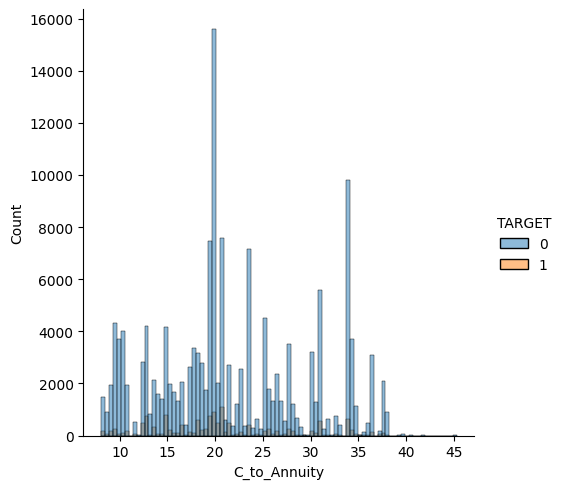

In [6]:
# The distribution of C_to_Annuity
sns.displot(data=preproc, x="C_to_Annuity",hue="TARGET")
plt.show()

### Credit to Income Ratio

In [7]:
preproc["C_to_Income"] = preproc["AMT_CREDIT"] / preproc["AMT_INCOME_TOTAL"]
preproc["C_to_Income"].value_counts()

C_to_Income
2.000000    2972
3.000000    2151
2.500000    1735
5.000000    1721
3.333333    1592
            ... 
0.605292       1
1.232370       1
1.083491       1
5.621293       1
4.231400       1
Name: count, Length: 34276, dtype: int64

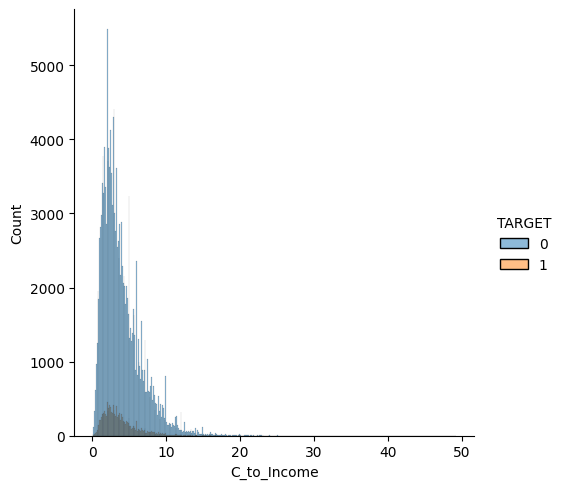

In [8]:
# The distribution of C_to_Income
sns.displot(data=preproc, x="C_to_Income", hue="TARGET")
plt.show()

### NAME_FAMILY_STATUS

In [9]:
preproc.drop(preproc.loc[preproc["NAME_FAMILY_STATUS"]=="Unknown"].index, inplace=True)
preproc["NAME_FAMILY_STATUS"].value_counts()

NAME_FAMILY_STATUS
Married                 109320
Single / not married     25285
Civil marriage           16651
Separated                10988
Widow                     8952
Name: count, dtype: int64

### REGION_Id

as said before, we will treat this as a unique Id. But first let's check if they share values

In [10]:
print("train unique regions: ",preproc["REGION_POPULATION_RELATIVE"].nunique())
print("test unique regions: ",test["REGION_POPULATION_RELATIVE"].nunique())
same_regions = set(preproc["REGION_POPULATION_RELATIVE"]).intersection(set(test["REGION_POPULATION_RELATIVE"]))
print("Number of same regions in both preproc and test: ", len(same_regions))
print("Region not in test: ", set(preproc["REGION_POPULATION_RELATIVE"]) - same_regions)

train unique regions:  81
test unique regions:  80
Number of same regions in both preproc and test:  80
Region not in test:  {0.00029}


interestingly one 1 region is not shared, let's take a look at it

In [11]:
preproc[preproc["REGION_POPULATION_RELATIVE"]==0.00029].shape[0]

1

since it's only 1 row we will drop it

In [12]:
preproc.drop(preproc.loc[preproc["REGION_POPULATION_RELATIVE"]==0.00029].index, inplace=True)

the rest we will label encode on population size

In [13]:
region_order = preproc["REGION_POPULATION_RELATIVE"].sort_values().unique()
region_order

array([0.000533, 0.000938, 0.001276, 0.001333, 0.001417, 0.002042,
       0.002134, 0.002506, 0.003069, 0.003122, 0.003541, 0.003813,
       0.003818, 0.004849, 0.00496 , 0.005002, 0.005084, 0.005144,
       0.005313, 0.006008, 0.006207, 0.006233, 0.006296, 0.006305,
       0.006629, 0.006671, 0.006852, 0.00702 , 0.007114, 0.00712 ,
       0.007274, 0.007305, 0.00733 , 0.008019, 0.008068, 0.00823 ,
       0.008474, 0.008575, 0.008625, 0.008866, 0.009175, 0.009334,
       0.009549, 0.00963 , 0.009657, 0.010006, 0.010032, 0.010147,
       0.010276, 0.0105  , 0.010556, 0.010643, 0.010966, 0.011657,
       0.011703, 0.014464, 0.01452 , 0.015221, 0.016612, 0.018029,
       0.018209, 0.018634, 0.018801, 0.01885 , 0.019101, 0.019689,
       0.020246, 0.020713, 0.022625, 0.0228  , 0.02461 , 0.025164,
       0.026392, 0.028663, 0.030755, 0.031329, 0.032561, 0.035792,
       0.04622 , 0.072508])

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
ordinal_region = OrdinalEncoder(categories=[region_order])
preproc["REGION_Id"] = ordinal_region.fit_transform(preproc[["REGION_POPULATION_RELATIVE"]])
preproc["REGION_Id"].value_counts()

REGION_Id
77.0    9077
78.0    7509
74.0    6854
71.0    6664
72.0    6440
        ... 
2.0      310
4.0      264
3.0      130
0.0       21
1.0       17
Name: count, Length: 80, dtype: int64

sanity check

In [16]:
print(preproc[preproc["REGION_Id"]==0].shape[0])
print(preproc[preproc["REGION_POPULATION_RELATIVE"]==0.000533].shape[0])

21
21


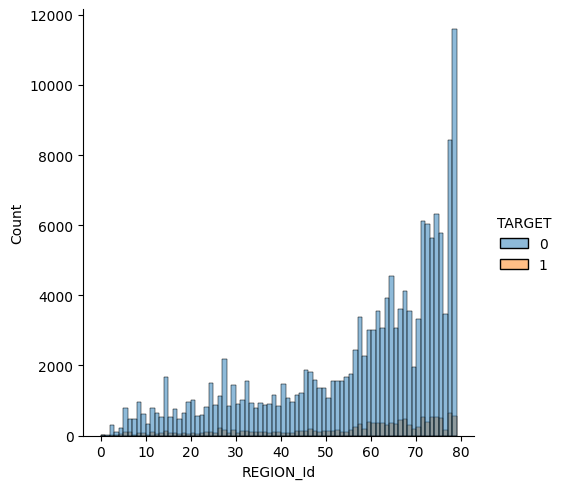

In [17]:
sns.displot(data=preproc, x="REGION_Id",hue="TARGET")

In [18]:
preproc.drop(columns=["REGION_POPULATION_RELATIVE"], inplace=True)

### Age

since we have days since birth, a simple division should yield the age

In [19]:
preproc["Age"] = preproc["DAYS_BIRTH"] // -365
preproc["Age"].value_counts()

Age
39    4893
38    4888
37    4848
40    4831
36    4811
27    4737
43    4660
31    4641
41    4601
42    4510
28    4425
32    4396
30    4340
44    4337
35    4336
33    4280
29    4260
34    4220
54    4199
53    4163
45    4074
46    4073
48    3940
47    3936
56    3835
52    3777
55    3744
57    3740
49    3736
51    3720
59    3708
50    3664
60    3481
58    3418
62    3100
61    3042
63    2863
64    2817
26    2478
25    2353
23    2230
24    2154
65    1785
22    1677
66    1181
67    1093
21     699
68     492
69       9
Name: count, dtype: int64

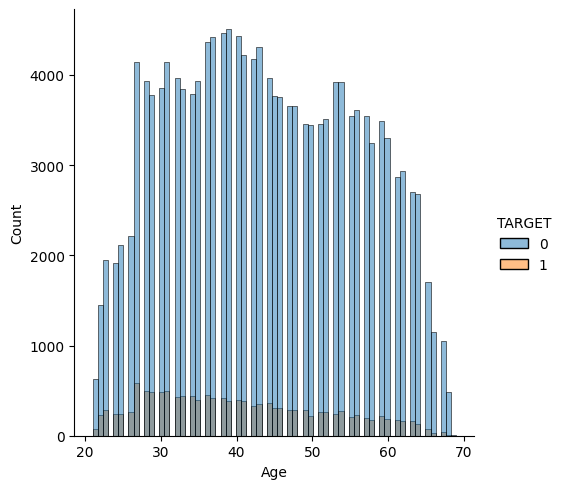

In [20]:
sns.displot(data=preproc, x="Age",hue="TARGET")
plt.show()

In [21]:
preproc.drop("DAYS_BIRTH", axis=1, inplace=True)

### Employed_Years

If positive change to zero, else -365 to add a year because we would like to count the first year after working for even 1 day

In [22]:
preproc["Employed_Years"] = preproc["DAYS_EMPLOYED"].apply(lambda x: 0 if x>0 else x-365) // -365
preproc["Employed_Years"].value_counts()

Employed_Years
0     30897
2     17620
3     16542
1     15500
4     14025
5     12061
6      8932
7      8371
8      7291
9      6310
10     5072
11     4117
12     3328
13     2981
15     2634
14     2489
16     1518
17     1273
18     1105
19     1067
20     1056
21      914
22      851
23      694
24      550
25      524
26      452
27      378
29      352
28      347
30      302
31      254
32      240
35      195
34      184
33      182
36      151
37      108
40       69
39       69
38       52
42       38
41       36
43       26
45       14
44        9
46        8
49        4
50        1
47        1
48        1
Name: count, dtype: int64

In [23]:
preproc.drop("DAYS_EMPLOYED", axis=1, inplace=True)

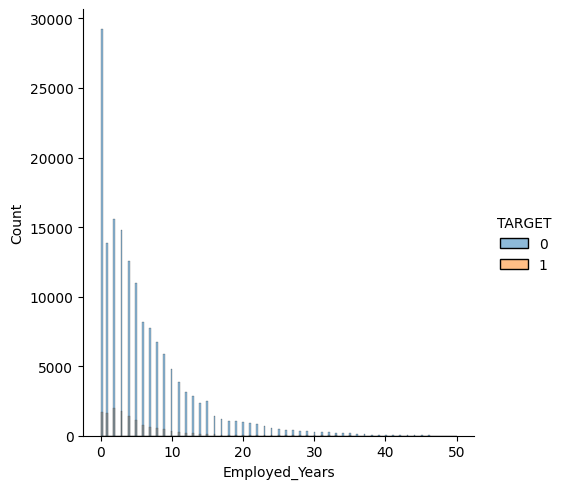

In [24]:
sns.displot(data=preproc, x="Employed_Years",hue="TARGET")
plt.show()

### Registration_Years

In [25]:
preproc["Registration_Years"] = preproc["DAYS_REGISTRATION"] // -365
preproc["Registration_Years"].value_counts()

Registration_Years
0.0     9314
1.0     8648
2.0     8248
3.0     7414
12.0    7256
        ... 
60.0       1
67.0       1
58.0       1
65.0       1
61.0       1
Name: count, Length: 63, dtype: int64

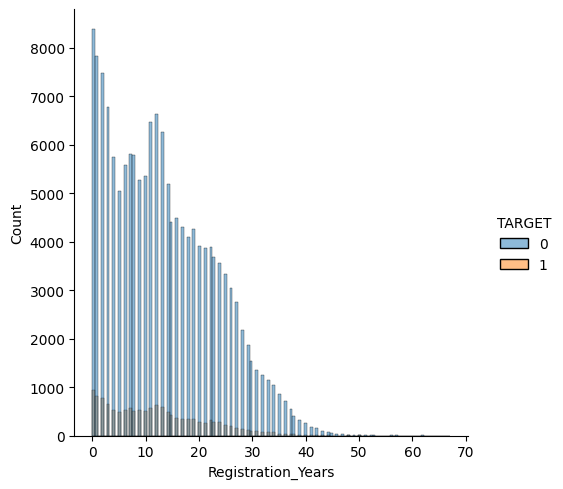

In [26]:
sns.displot(data=preproc, x="Registration_Years",hue="TARGET")

In [27]:
preproc.drop("DAYS_REGISTRATION", axis=1, inplace=True)

### Publish_Years

In [28]:
preproc["Publish_Years"] = preproc["DAYS_ID_PUBLISH"] // -365
preproc["Publish_Years"].value_counts()

Publish_Years
11    24551
12    21395
10    11955
13    11361
7     10768
9     10638
8     10358
6     10198
2      9769
5      9609
3      9507
4      9280
1      8819
0      8312
14     3099
15     1093
16      461
17       21
19        1
Name: count, dtype: int64

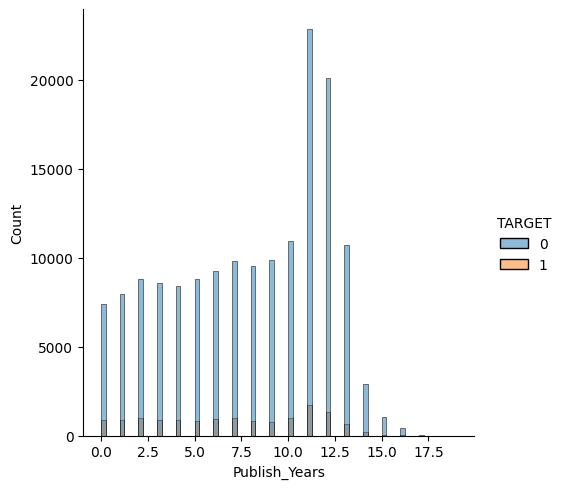

In [29]:
sns.displot(data=preproc, x="Publish_Years",hue="TARGET")

In [30]:
preproc.drop("DAYS_ID_PUBLISH", axis=1, inplace=True)

### OWN_CAR_AGE

we will inspect the missing columns's age

In [31]:
preproc[preproc["OWN_CAR_AGE"].isna()]["Age"].value_counts()

Age
54    2965
39    2955
27    2935
53    2912
40    2900
56    2889
38    2884
37    2870
36    2867
59    2844
43    2825
57    2799
41    2756
60    2747
42    2734
31    2731
28    2710
55    2681
44    2640
46    2609
52    2606
32    2598
48    2590
58    2588
29    2573
47    2565
45    2563
51    2548
30    2542
33    2540
35    2527
49    2478
62    2475
34    2469
61    2425
50    2412
64    2332
63    2272
65    1530
25    1529
23    1526
26    1520
24    1403
22    1186
66    1025
67     950
21     529
68     424
69       9
Name: count, dtype: int64

the distribution doesn't seem to point to anything so we would assume they don't own a car

In [32]:
preproc["OWN_CAR_AGE"] = preproc["OWN_CAR_AGE"].fillna(0)

In [33]:
mean_age = preproc["OWN_CAR_AGE"].mean()
std_age = preproc["OWN_CAR_AGE"].std()
bound_age = mean_age + 3*std_age
preproc["OWN_CAR_AGE"] = preproc["OWN_CAR_AGE"].apply(lambda x: bound_age if x>bound_age else x)
preproc["OWN_CAR_AGE"].value_counts()

OWN_CAR_AGE
0.000000     114170
7.000000       4074
3.000000       3578
6.000000       3522
2.000000       3293
8.000000       3281
4.000000       3093
1.000000       3044
9.000000       2804
10.000000      2614
31.014296      2586
13.000000      2556
14.000000      2553
12.000000      2390
11.000000      2278
15.000000      1975
5.000000       1959
16.000000      1898
17.000000      1621
18.000000      1383
19.000000      1022
20.000000       886
21.000000       770
22.000000       706
24.000000       638
23.000000       593
25.000000       458
26.000000       316
28.000000       315
27.000000       270
29.000000       214
30.000000       191
31.000000       144
Name: count, dtype: int64

### FLAG_MOBIL

In [34]:
preproc.drop(columns=["FLAG_MOBIL"], inplace=True)

### FLAG_EMP_PHONE

In [35]:
preproc.drop(columns=["FLAG_EMP_PHONE"], inplace=True)

### CNT_FAM_MEMBERS

In [36]:
preproc["CNT_FAM_MEMBERS"] = preproc["CNT_FAM_MEMBERS"].apply(lambda x: 8 if x>=8 else x)

### Income_per_Capita

In [37]:
preproc["Income_per_Capita"] = preproc["AMT_INCOME_TOTAL"] / preproc["CNT_FAM_MEMBERS"]
preproc["Income_per_Capita"].value_counts()

Income_per_Capita
67500.00     13565
90000.00     11343
45000.00     11244
112500.00    10415
56250.00      9659
             ...  
26523.00         1
158349.00        1
28523.25         1
23082.00         1
142587.00        1
Name: count, Length: 2021, dtype: int64

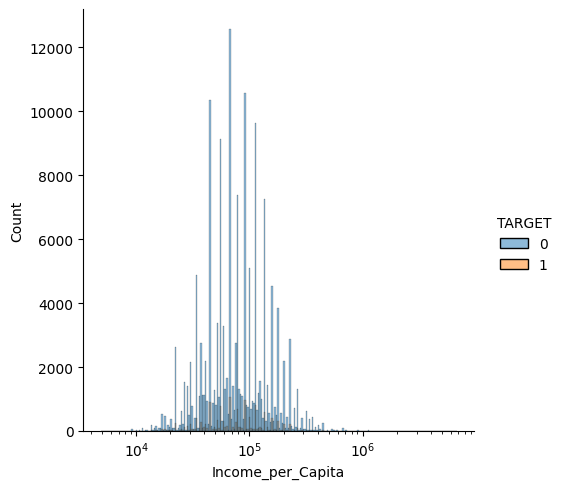

In [38]:
sns.displot(data=preproc, x="Income_per_Capita",hue="TARGET",log_scale=10)

### Org_Field

this feature groups the different types of the same field

In [39]:
fields = preproc["ORGANIZATION_TYPE"].unique().tolist()
fields = [field.split()[0].replace(":","") for field in fields]
fields = set(fields)
print(fields)

{'Culture', 'Construction', 'Transport', 'Emergency', 'Hotel', 'Police', 'Self-employed', 'Legal', 'Kindergarten', 'School', 'Restaurant', 'Medicine', 'Security', 'XNA', 'Telecom', 'Advertising', 'Realtor', 'Bank', 'Insurance', 'Housing', 'Business', 'Services', 'Government', 'Electricity', 'Postal', 'Cleaning', 'University', 'Religion', 'Agriculture', 'Military', 'Industry', 'Mobile', 'Trade', 'Other'}


In [40]:
preproc["Org_Field"] = preproc["ORGANIZATION_TYPE"].apply(lambda x: x.split()[0].replace(":",""))
preproc["Org_Field"].value_counts()

Org_Field
Business         47186
XNA              30897
Self-employed    21340
Other             9272
Industry          8015
Trade             7860
Medicine          6271
Government        5721
School            4991
Transport         4978
Kindergarten      3865
Construction      3700
Security          2921
Housing           1613
Military          1452
Bank              1385
Agriculture       1338
Police            1279
Postal            1185
Restaurant        1018
Services           872
University         779
Hotel              545
Electricity        539
Insurance          315
Telecom            310
Emergency          303
Advertising        243
Realtor            242
Culture            203
Legal              183
Mobile             175
Cleaning           146
Religion            53
Name: count, dtype: int64

### Phone_Years

In [41]:
preproc["Phone_Years"] = preproc["DAYS_LAST_PHONE_CHANGE"] // -365
preproc["Phone_Years"] = preproc["Phone_Years"].apply(lambda x: 0 if x<0 else x)
preproc["Phone_Years"].value_counts()

Phone_Years
0.0     51446
1.0     32067
4.0     21284
2.0     21219
3.0     16644
5.0     12254
6.0      8436
7.0      4569
8.0      2313
9.0       843
10.0      105
11.0       15
Name: count, dtype: int64

<Axes: xlabel='Phone_Years', ylabel='count'>

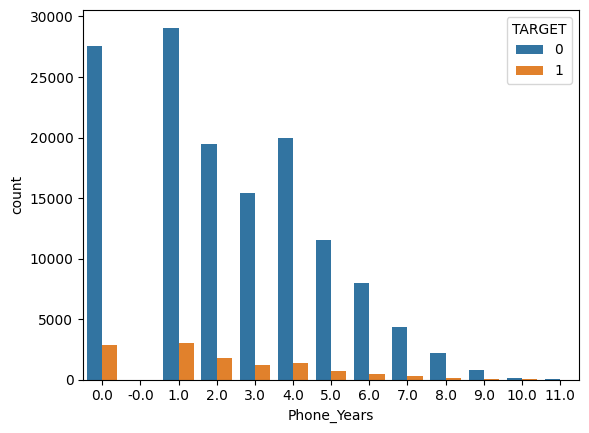

In [42]:
sns.countplot(data=preproc, x="Phone_Years",hue="TARGET")

In [43]:
preproc.drop(columns=["DAYS_LAST_PHONE_CHANGE"], inplace=True)

### EXT_SOURCE_1

we will try the impute by age mean as discussed before

<Axes: xlabel='Age'>

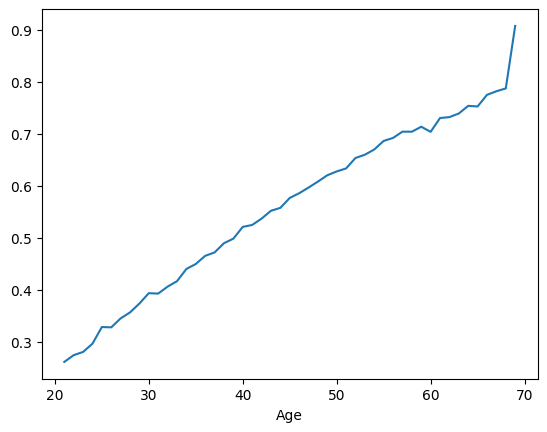

In [44]:
ext_1_by_age = preproc.groupby("Age")["EXT_SOURCE_1"].mean()
sns.lineplot(x=ext_1_by_age.index, y=ext_1_by_age.values)

as we can see that's a very nice graph to signal us that they are strongly correlated and we will proceed with the imputation

In [45]:
ext_1_age_map = ext_1_by_age.to_dict()

preproc['EXT_SOURCE_1'] = preproc.apply(lambda row: ext_1_age_map[row['Age']] if pd.isna(row['EXT_SOURCE_1']) else row['EXT_SOURCE_1'], axis=1)

preproc['EXT_SOURCE_1'].isna().sum()

0

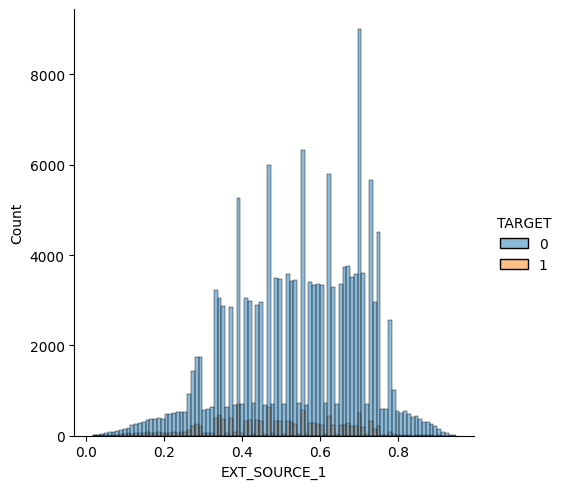

In [46]:
sns.displot(data=preproc, x="EXT_SOURCE_1",hue="TARGET")

### EXT_SOURCE_2

In [47]:
preproc["EXT_SOURCE_2"].fillna(train["EXT_SOURCE_2"].mean(), inplace=True)

In [48]:
preproc["EXT_SOURCE_2"].isna().sum()

0

### EXT_SOURCE_3

In [49]:
preproc["EXT_SOURCE_3"].fillna(train["EXT_SOURCE_3"].mean(), inplace=True)

In [50]:
preproc["EXT_SOURCE_3"].isna().sum()

0

### EXT_SOURCE_RATIOS

as discussed above, since all three ext_sources are weakly correlated, we could make ratios between them to extract more information

but first we must make sure that there are no zeroes which would lead to an inf value

In [51]:
for i in ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]:
    preproc[i] = preproc[i].apply(lambda x: 10^-6 if x<=0 else x)

In [52]:
preproc['EXT_1_to_EXT_2'] = preproc['EXT_SOURCE_1'] / preproc['EXT_SOURCE_2']
preproc['EXT_1_to_EXT_3'] = preproc['EXT_SOURCE_1'] / preproc['EXT_SOURCE_3']
preproc['EXT_2_to_EXT_3'] = preproc['EXT_SOURCE_2'] / preproc['EXT_SOURCE_3']

### Neighbour_Target_Mean

the mean of the Target of the k-nearest neighbours of a row based on EXT_SOURCES and C_To_Annuity 

※reasoning on ideas.ipynb

In [53]:
from sklearn.preprocessing import MinMaxScaler

# We will first need to normalize C_to_Annuity
scaler = MinMaxScaler()
preproc['C_to_Annuity'] = scaler.fit_transform(preproc[['C_to_Annuity']])


In [102]:
from sklearn.neighbors import NearestNeighbors

k_num = 300
# Define the features to use for finding nearest neighbors
features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'C_to_Annuity']
# Fit the NearestNeighbors model
nn = NearestNeighbors(n_neighbors=k_num, algorithm='ball_tree')
nn.fit(preproc[features])

NearestNeighbors(algorithm='ball_tree', n_neighbors=300)

In [55]:
# Find the 500 nearest neighbors for each row
distances, indices = nn.kneighbors(preproc[features].fillna(0))

# Calculate the mean target value of the nearest neighbors
preproc['Neighbour_Target_Mean'] = [preproc.iloc[indices[i]]['TARGET'].mean() for i in range(len(preproc))]

print(preproc['Neighbour_Target_Mean'].head())

0    0.134
1    0.044
2    0.062
3    0.048
4    0.122
Name: Neighbour_Target_Mean, dtype: float64


### AMT_REQ_CREDIT_BUREAU_HOUR

In [56]:
preproc.drop(columns=["AMT_REQ_CREDIT_BUREAU_HOUR"], inplace=True)

### AMT_REQ_CREDIT_BUREAU_MON

In [57]:
preproc["AMT_REQ_CREDIT_BUREAU_MON"] = preproc["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0)
preproc["AMT_REQ_CREDIT_BUREAU_MON"] = preproc["AMT_REQ_CREDIT_BUREAU_MON"].apply(lambda x: 2 if x>=2 else x)
preproc["AMT_REQ_CREDIT_BUREAU_MON"].value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0    146843
1.0     18463
2.0      5889
Name: count, dtype: int64

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_MON', ylabel='count'>

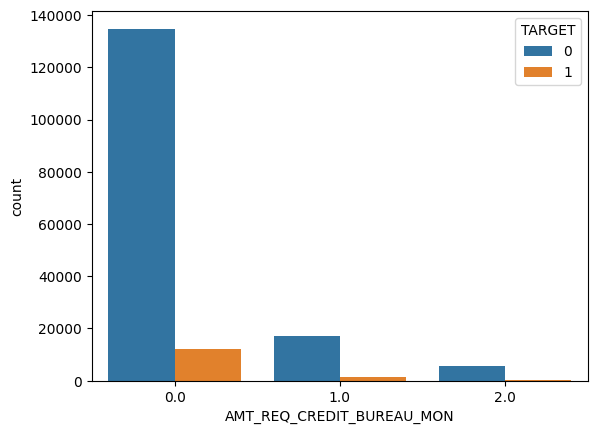

In [58]:
sns.countplot(data=preproc, x="AMT_REQ_CREDIT_BUREAU_MON",hue="TARGET")

### AMT_REQ_CREDIT_BUREAU_QRT

In [59]:
preproc.drop(columns=["AMT_REQ_CREDIT_BUREAU_QRT"], inplace=True)

### AMT_REQ_CREDIT_BUREAU_YEAR

In [60]:
preproc["AMT_REQ_CREDIT_BUREAU_YEAR"] = preproc["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0)
preproc["AMT_REQ_CREDIT_BUREAU_YEAR"] = preproc["AMT_REQ_CREDIT_BUREAU_YEAR"].apply(lambda x: 9 if x>=9 else x)
preproc["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0    62983
1.0    35369
2.0    27869
3.0    18724
4.0    11590
5.0     6637
6.0     3989
7.0     2176
8.0     1153
9.0      705
Name: count, dtype: int64

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_YEAR', ylabel='count'>

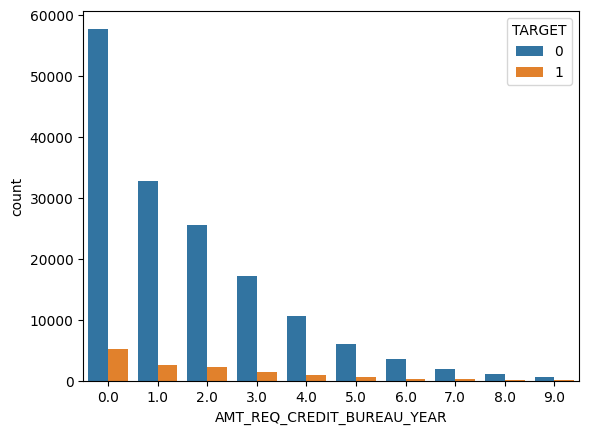

In [61]:
sns.countplot(data=preproc, x="AMT_REQ_CREDIT_BUREAU_YEAR",hue="TARGET")

### Encoding

In [62]:
preproc.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OWN_CAR_AGE', 'FLAG_WORK_PHONE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET',
       'C_to_Annuity', 'C_to_Income', 'REGION_Id', 'Age', 'Employed_Years',
       'Registration_Years', 'Publish_Years', 'Income_per_Capita', 'Org_Field',
       'Phone_Years', 'EXT_1_to_EXT_2', 'EXT_1_to_EXT_3', 'EXT_2_to_EXT_3',
       'Neighbour_Target_Mean'],
      dtype='object')

In [63]:
preproc.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,Employed_Years,Registration_Years,Publish_Years,Income_per_Capita,Org_Field,Phone_Years,EXT_1_to_EXT_2,EXT_1_to_EXT_3,EXT_2_to_EXT_3,Neighbour_Target_Mean
0,0,Cash loans,1,0,112500.0,755190.0,36328.5,675000.0,Working,Higher education,...,3,0.0,1,56250.0,School,0.0,0.880268,0.641616,0.728888,0.134
1,1,Cash loans,1,0,225000.0,585000.0,16893.0,585000.0,Pensioner,Secondary / secondary special,...,0,12.0,9,112500.0,XNA,1.0,1.525606,1.239887,0.812718,0.044
2,2,Cash loans,1,0,54000.0,334152.0,18256.5,270000.0,State servant,Secondary / secondary special,...,2,9.0,5,27000.0,Postal,1.0,1.101291,1.226950,1.114102,0.062
3,3,Cash loans,1,0,67500.0,152820.0,8901.0,135000.0,Pensioner,Lower secondary,...,0,13.0,10,67500.0,XNA,-0.0,7.359350,1.009036,0.137109,0.048
4,4,Cash loans,0,0,157500.0,271066.5,21546.0,234000.0,Commercial associate,Secondary / secondary special,...,2,13.0,8,78750.0,Business,3.0,1.690673,0.511682,0.302650,0.122


In [64]:
to_categorical = ["CODE_GENDER", "FLAG_WORK_PHONE","REGION_RATING_CLIENT","Age","REGION_Id" ]
preproc[to_categorical] = preproc[to_categorical].astype("object")

In [65]:
encode_cols = ["NAME_CONTRACT_TYPE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE", "Org_Field"]

we will one hot encoded the above columns

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
one_coder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
one_hot_encoded = one_coder.fit_transform(preproc[encode_cols])
one_hot_encoded = pd.DataFrame(one_hot_encoded, columns=one_coder.get_feature_names_out(encode_cols))
print(preproc.shape)
print(one_hot_encoded.shape)
preproc.drop(columns=encode_cols, inplace=True)
preproc = pd.concat([preproc.reset_index(drop=True), one_hot_encoded.reset_index(drop=True)], axis=1)
print(preproc.shape)

(171195, 38)
(171195, 137)
(171195, 167)


In [68]:
preproc.shape

(171195, 167)

In [69]:
preproc.head()

,SK_ID_CURR,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,OWN_CAR_AGE,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,...,Org_Field_Restaurant,Org_Field_School,Org_Field_Security,Org_Field_Self-employed,Org_Field_Services,Org_Field_Telecom,Org_Field_Trade,Org_Field_Transport,Org_Field_University,Org_Field_XNA
0,0,1,0,112500.0,755190.0,36328.5,675000.0,0.0,1,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,225000.0,585000.0,16893.0,585000.0,0.0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,0,54000.0,334152.0,18256.5,270000.0,0.0,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,0,67500.0,152820.0,8901.0,135000.0,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0,0,157500.0,271066.5,21546.0,234000.0,0.0,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
ref_data = preproc.copy()

## 3. Preprocessing Pipeline

In [103]:
def preprocess_data(data,ref_data):
    pre_data = data.copy()
    pre_data.drop(pre_data.loc[pre_data['CODE_GENDER']=='XNA'].index, inplace=True)
    pre_data["CODE_GENDER"].replace({"M": 0, "F": 1}, inplace=True)
    pre_data["C_to_Annuity"] = pre_data["AMT_CREDIT"] / pre_data["AMT_ANNUITY"]
    pre_data["C_to_Income"] = pre_data["AMT_CREDIT"] / pre_data["AMT_INCOME_TOTAL"]
    pre_data.drop(pre_data.loc[pre_data["NAME_FAMILY_STATUS"]=="Unknown"].index, inplace=True)
    pre_data.drop(pre_data.loc[pre_data["REGION_POPULATION_RELATIVE"]==0.00029].index, inplace=True)
    pre_data["REGION_Id"] = ordinal_region.transform(pre_data[["REGION_POPULATION_RELATIVE"]])
    pre_data.drop(columns=["REGION_POPULATION_RELATIVE"], inplace=True)
    pre_data["Age"] = pre_data["DAYS_BIRTH"] // -365
    pre_data.drop("DAYS_BIRTH", axis=1, inplace=True)
    pre_data["Employed_Years"] = pre_data["DAYS_EMPLOYED"].apply(lambda x: 0 if x>0 else x-365) // -365
    pre_data.drop("DAYS_EMPLOYED", axis=1, inplace=True)
    pre_data["Registration_Years"] = pre_data["DAYS_REGISTRATION"] // -365
    pre_data.drop("DAYS_REGISTRATION", axis=1, inplace=True)
    pre_data["Publish_Years"] = pre_data["DAYS_ID_PUBLISH"] // -365
    pre_data.drop("DAYS_ID_PUBLISH", axis=1, inplace=True)
    pre_data["OWN_CAR_AGE"] = pre_data["OWN_CAR_AGE"].fillna(0)
    pre_data["OWN_CAR_AGE"] = pre_data["OWN_CAR_AGE"].apply(lambda x: bound_age if x>bound_age else x)
    pre_data.drop(columns=["FLAG_MOBIL"], inplace=True)
    pre_data.drop(columns=["FLAG_EMP_PHONE"], inplace=True)
    pre_data["CNT_FAM_MEMBERS"] = pre_data["CNT_FAM_MEMBERS"].apply(lambda x: 8 if x>=8 else x)
    pre_data["Income_per_Capita"] = pre_data["AMT_INCOME_TOTAL"] / pre_data["CNT_FAM_MEMBERS"]
    pre_data["Org_Field"] = pre_data["ORGANIZATION_TYPE"].apply(lambda x: x.split()[0].replace(":",""))
    pre_data["Phone_Years"] = pre_data["DAYS_LAST_PHONE_CHANGE"] // -365
    pre_data["Phone_Years"] = pre_data["Phone_Years"].apply(lambda x: 0 if x<0 else x)
    pre_data.drop(columns=["DAYS_LAST_PHONE_CHANGE"], inplace=True)

    pre_data['EXT_SOURCE_1'] = pre_data.apply(lambda row: ext_1_age_map[row['Age']] if pd.isna(row['EXT_SOURCE_1']) else row['EXT_SOURCE_1'], axis=1)
    for i in ["EXT_SOURCE_2","EXT_SOURCE_3"]:
        pre_data[i] = pre_data[i].fillna(ref_data[i].mean())
    for i in ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]:
        pre_data[i] = pre_data[i].apply(lambda x: 10^-6 if x<=0 else x)
    pre_data['EXT_1_to_EXT_2'] = pre_data['EXT_SOURCE_1'] / pre_data['EXT_SOURCE_2']
    pre_data['EXT_1_to_EXT_3'] = pre_data['EXT_SOURCE_1'] / pre_data['EXT_SOURCE_3']
    pre_data['EXT_2_to_EXT_3'] = pre_data['EXT_SOURCE_2'] / pre_data['EXT_SOURCE_3']

    pre_data['C_to_Annuity'] = scaler.transform(pre_data[['C_to_Annuity']])
    features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'C_to_Annuity']
    distances, indices = nn.kneighbors(pre_data[features].fillna(0))
    pre_data['Neighbour_Target_Mean'] = [ref_data.iloc[indices[i]]['TARGET'].mean() for i in range(len(pre_data))]

    pre_data.drop(columns=["AMT_REQ_CREDIT_BUREAU_HOUR"], inplace=True)
    pre_data["AMT_REQ_CREDIT_BUREAU_MON"] = pre_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0)
    pre_data["AMT_REQ_CREDIT_BUREAU_MON"] = pre_data["AMT_REQ_CREDIT_BUREAU_MON"].apply(lambda x: 2 if x>=2 else x)
    pre_data.drop(columns=["AMT_REQ_CREDIT_BUREAU_QRT"], inplace=True)
    pre_data["AMT_REQ_CREDIT_BUREAU_YEAR"] = pre_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0)
    pre_data["AMT_REQ_CREDIT_BUREAU_YEAR"] = pre_data["AMT_REQ_CREDIT_BUREAU_YEAR"].apply(lambda x: 9 if x>=9 else x)

    to_categorical = ["CODE_GENDER", "FLAG_WORK_PHONE","REGION_RATING_CLIENT","Age","REGION_Id" ]
    pre_data[to_categorical] = pre_data[to_categorical].astype("object")
    encode_cols = ["NAME_CONTRACT_TYPE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE",  "Org_Field"]
    one_hot_encoded = one_coder.transform(pre_data[encode_cols])
    one_hot_encoded = pd.DataFrame(one_hot_encoded, columns=one_coder.get_feature_names_out(encode_cols))
    pre_data.drop(columns=encode_cols, inplace=True)
    pre_data = pd.concat([pre_data.reset_index(drop=True), one_hot_encoded.reset_index(drop=True)], axis=1)
    return pre_data

## 4. Machine learning model creation

### Train Test Splitting

In [72]:
# Loading libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [104]:
mod_df = preprocess_data(train,ref_data)

In [105]:
# Split the data into explanatory and objective variables
X = mod_df.drop("TARGET", axis=1).values
y = mod_df["TARGET"].values
X_test = test.values

In [106]:
mod_df.head()

,SK_ID_CURR,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,OWN_CAR_AGE,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,...,Org_Field_Restaurant,Org_Field_School,Org_Field_Security,Org_Field_Self-employed,Org_Field_Services,Org_Field_Telecom,Org_Field_Trade,Org_Field_Transport,Org_Field_University,Org_Field_XNA
0,0,1,0,112500.0,755190.0,36328.5,675000.0,0.0,1,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,225000.0,585000.0,16893.0,585000.0,0.0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,0,54000.0,334152.0,18256.5,270000.0,0.0,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,0,67500.0,152820.0,8901.0,135000.0,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0,0,157500.0,271066.5,21546.0,234000.0,0.0,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
preproc.head()

,SK_ID_CURR,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,OWN_CAR_AGE,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,...,Org_Field_Restaurant,Org_Field_School,Org_Field_Security,Org_Field_Self-employed,Org_Field_Services,Org_Field_Telecom,Org_Field_Trade,Org_Field_Transport,Org_Field_University,Org_Field_XNA
0,0,1,0,112500.0,755190.0,36328.5,675000.0,0.0,1,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,225000.0,585000.0,16893.0,585000.0,0.0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,0,54000.0,334152.0,18256.5,270000.0,0.0,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,0,67500.0,152820.0,8901.0,135000.0,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0,0,157500.0,271066.5,21546.0,234000.0,0.0,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [358]:
X.shape, y.shape, X_test.shape

((171195, 165), (171195,), (61500, 33))

In [107]:
# Split the original data into the training data and the evaluatioin data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

### Catboost

In [79]:
from catboost import CatBoostClassifier

In [360]:
cb = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, l2_leaf_reg=3, loss_function='Logloss', eval_metric='AUC', random_seed=0)
cb.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, verbose=50)

0:	test: 0.6191560	best: 0.6191560 (0)	total: 24.7ms	remaining: 24.7s
50:	test: 0.7427839	best: 0.7427839 (50)	total: 1.25s	remaining: 23.3s
100:	test: 0.7474817	best: 0.7474817 (100)	total: 2.51s	remaining: 22.3s
150:	test: 0.7503564	best: 0.7503564 (150)	total: 3.84s	remaining: 21.6s
200:	test: 0.7522946	best: 0.7522946 (200)	total: 5.18s	remaining: 20.6s
250:	test: 0.7535529	best: 0.7536607 (244)	total: 6.5s	remaining: 19.4s
300:	test: 0.7541841	best: 0.7542041 (299)	total: 7.78s	remaining: 18.1s
350:	test: 0.7544243	best: 0.7544685 (344)	total: 9.01s	remaining: 16.7s
400:	test: 0.7548866	best: 0.7549861 (394)	total: 10.3s	remaining: 15.4s
450:	test: 0.7550141	best: 0.7550222 (403)	total: 11.5s	remaining: 14s
500:	test: 0.7548003	best: 0.7550369 (453)	total: 12.7s	remaining: 12.7s
550:	test: 0.7544205	best: 0.7550369 (453)	total: 14s	remaining: 11.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.755036895
bestIteration = 453

Shrink model to first 454 iteratio

### Optuna Tuning

In [ ]:
import optuna
from optuna.samplers import TPESampler

In [ ]:
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'random_seed': 0,
        'loss_function': 'Logloss',
        'eval_metric': 'AUC'
    }

    cb = CatBoostClassifier(**param)
    cb.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, verbose=False)
    
    preds = cb.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, preds)
    
    return auc

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=0))
study.optimize(objective, n_trials=50)

[I 2025-03-11 03:56:48,880] A new study created in memory with name: no-name-e7d6d921-7571-4fd8-9a47-e9bf44bd9a6d
[I 2025-03-11 03:57:15,333] Trial 0 finished with value: 0.7463111387851971 and parameters: {'iterations': 594, 'depth': 9, 'learning_rate': 0.01605191133358762, 'l2_leaf_reg': 0.15119336467641012}. Best is trial 0 with value: 0.7463111387851971.
[I 2025-03-11 03:57:34,289] Trial 1 finished with value: 0.7428279762081195 and parameters: {'iterations': 481, 'depth': 8, 'learning_rate': 0.007501954443620123, 'l2_leaf_reg': 3.6905577292137624}. Best is trial 0 with value: 0.7463111387851971.
[I 2025-03-11 03:58:00,031] Trial 2 finished with value: 0.753424026996579 and parameters: {'iterations': 968, 'depth': 6, 'learning_rate': 0.03832216850492789, 'l2_leaf_reg': 0.13049073550362397}. Best is trial 2 with value: 0.753424026996579.
[I 2025-03-11 03:58:42,558] Trial 3 finished with value: 0.7301639604788468 and parameters: {'iterations': 611, 'depth': 10, 'learning_rate': 0.001

In [ ]:
print('Best trial:')
trial = study.best_trial
print(f'  Value: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

Best trial:
  Value: 0.7562929826217155
  Params: 
    iterations: 772
    depth: 4
    learning_rate: 0.09868044570954543
    l2_leaf_reg: 0.33088036633043105


In [80]:
# fin_model = CatBoostClassifier(**trial.params)
fin_params = {"iterations": 772,
    "depth": 4,
    "learning_rate": 0.09868044570954543,
    "l2_leaf_reg": 0.33088036633043105,
    'random_seed': 0,
    'loss_function': 'Logloss',
    'eval_metric': 'AUC'}
fin_boost = CatBoostClassifier(**fin_params)

In [108]:
fin_boost.fit(X_train, y_train, verbose=False)

In [109]:
preds = fin_boost.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, preds)

0.7588642194247951

### LightGBM

lightGBM is the second model tried because of its training speed compared to CatBoost

In [250]:
from lightgbm import LGBMClassifier

In [251]:
lg = LGBMClassifier()
lg.fit(X_train, y_train)
lg_preds = lg.predict_proba(X_valid)[:, 1]
print(roc_auc_score(y_valid, lg_preds))

  File "c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Number of positive: 9675, number of negative: 110161
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,009321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4266
[LightGBM] [Info] Number of data points in the train set: 119836, number of used features: 161
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,080735 -> initscore=-2,432398
[LightGBM] [Info] Start training from score -2,432398
0.750451942352089


In [ ]:
def objective_lgb(trial):
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10)
    }

    lgb = LGBMClassifier(**param)
    lgb.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])
    
    preds = lgb.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, preds)
    
    return auc

study_lgb = optuna.create_study(direction='maximize', sampler=TPESampler(seed=0))
study_lgb.optimize(objective_lgb, n_trials=50)



[I 2025-03-11 04:28:41,507] A new study created in memory with name: no-name-8f63fcb4-2359-4330-8835-3090cf17e114
[I 2025-03-11 04:28:51,687] Trial 0 finished with value: 0.7530782507769364 and parameters: {'num_leaves': 91, 'max_depth': 10, 'learning_rate': 0.01605191133358762, 'n_estimators': 590, 'min_child_samples': 54, 'subsample': 0.8229470565333281, 'colsample_bytree': 0.7187936056313462, 'reg_alpha': 3.6905577292137624, 'reg_lambda': 7.155682161754871}. Best is trial 0 with value: 0.7530782507769364.
[I 2025-03-11 04:29:01,891] Trial 1 finished with value: 0.7537909276277254 and parameters: {'num_leaves': 70, 'max_depth': 10, 'learning_rate': 0.011423254155608374, 'n_estimators': 611, 'min_child_samples': 94, 'subsample': 0.5355180290989434, 'colsample_bytree': 0.5435646498507704, 'reg_alpha': 0.001204685241203032, 'reg_lambda': 2.1403233140986067}. Best is trial 1 with value: 0.7537909276277254.
[I 2025-03-11 04:29:16,729] Trial 2 finished with value: 0.732326359457543 and par

In [ ]:
print('Best trial:')
trial_lgb = study_lgb.best_trial
print(f'  Value: {trial_lgb.value}')
print('  Params: ')
for key, value in trial_lgb.params.items():
    print(f'    {key}: {value}')

Best trial:
  Value: 0.7553122326465616
  Params: 
    num_leaves: 58
    max_depth: 8
    learning_rate: 0.029035931303326705
    n_estimators: 566
    min_child_samples: 86
    subsample: 0.5438783014299683
    colsample_bytree: 0.5424930656349038
    reg_alpha: 1.8825413711858707
    reg_lambda: 5.801670028620033


In [252]:
fin_params_lgb = {
    'objective': 'binary',
    'metric': 'auc',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    "num_leaves": 58,
    "max_depth": 8,
    "learning_rate": 0.029035931303326705,
    "n_estimators": 566,
    "min_child_samples": 86,
    "subsample": 0.5438783014299683,
    "colsample_bytree": 0.5424930656349038,
    "reg_alpha": 1.8825413711858707,
    "reg_lambda": 5.801670028620033}
fin_lgb = LGBMClassifier(**fin_params_lgb)

In [264]:
fin_lgb.fit(X_train, y_train)
lgb_preds = fin_lgb.predict_proba(X_valid)[:, 1]
print(roc_auc_score(y_valid, lgb_preds))

0.75557349078545


### Feature Importance

In [83]:
fin_boost.fit(X, y,verbose=False)

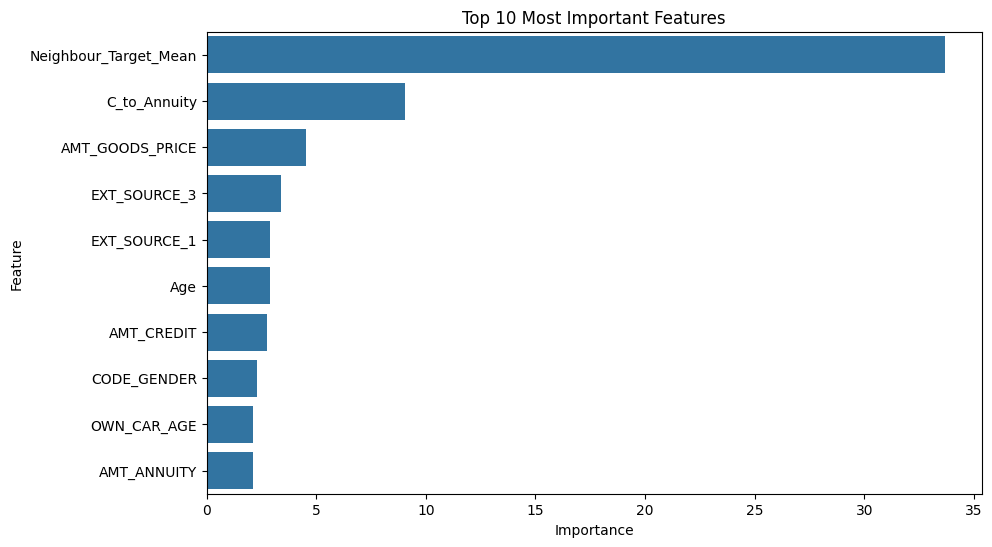

In [84]:
feature_importances = fin_boost.get_feature_importance()
feature_names = mod_df.drop("TARGET", axis=1).columns
print()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 10 Most Important Features')
plt.show()

## 5. Creating prediction results
Finally, let's make a prediction for the test data, and prepare a csv file to submit.

## Final fitting

In [96]:
fin_boost.fit(X, y)

0:	total: 18ms	remaining: 13.9s
1:	total: 32.4ms	remaining: 12.5s
2:	total: 49.2ms	remaining: 12.6s
3:	total: 66.3ms	remaining: 12.7s
4:	total: 85.1ms	remaining: 13s
5:	total: 99.5ms	remaining: 12.7s
6:	total: 117ms	remaining: 12.7s
7:	total: 134ms	remaining: 12.8s
8:	total: 151ms	remaining: 12.8s
9:	total: 167ms	remaining: 12.7s
10:	total: 185ms	remaining: 12.8s
11:	total: 204ms	remaining: 12.9s
12:	total: 220ms	remaining: 12.9s
13:	total: 237ms	remaining: 12.8s
14:	total: 256ms	remaining: 12.9s
15:	total: 274ms	remaining: 12.9s
16:	total: 294ms	remaining: 13s
17:	total: 311ms	remaining: 13s
18:	total: 326ms	remaining: 12.9s
19:	total: 342ms	remaining: 12.9s
20:	total: 357ms	remaining: 12.8s
21:	total: 373ms	remaining: 12.7s
22:	total: 389ms	remaining: 12.7s
23:	total: 407ms	remaining: 12.7s
24:	total: 422ms	remaining: 12.6s
25:	total: 439ms	remaining: 12.6s
26:	total: 455ms	remaining: 12.5s
27:	total: 470ms	remaining: 12.5s
28:	total: 487ms	remaining: 12.5s
29:	total: 505ms	remaining

In [ ]:
X_fin = preprocess_data(test,mod_df)

In [86]:
X_fin.head()

,SK_ID_CURR,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,OWN_CAR_AGE,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,...,Org_Field_Restaurant,Org_Field_School,Org_Field_Security,Org_Field_Self-employed,Org_Field_Services,Org_Field_Telecom,Org_Field_Trade,Org_Field_Transport,Org_Field_University,Org_Field_XNA
0,171202,1,1,144000.0,961146.0,28233.0,688500.0,0.0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,171203,1,0,103500.0,296280.0,16069.5,225000.0,0.0,1,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,171204,1,1,180000.0,183694.5,11236.5,139500.0,0.0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,171205,1,2,225000.0,450000.0,22500.0,450000.0,0.0,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,171206,1,2,144000.0,545040.0,26640.0,450000.0,14.0,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [284]:
X_fin.isna().sum()

SK_ID_CURR              0
CODE_GENDER             0
CNT_CHILDREN            0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
                       ..
Org_Field_Telecom       0
Org_Field_Trade         0
Org_Field_Transport     0
Org_Field_University    0
Org_Field_XNA           0
Length: 167, dtype: int64

In [99]:
preds = fin_boost.predict_proba(X_fin)[:, 1]

In [100]:
sample_sub["TARGET"] = preds
sample_sub

,SK_ID_CURR,TARGET
0,171202,0.023728
1,171203,0.128591
2,171204,0.205945
3,171205,0.094843
4,171206,0.173863
...,...,...
61495,232697,0.177579
61496,232698,0.036663
61497,232699,0.056229
61498,232700,0.216217


In [101]:
# Create the "output" directory if it doesn't exist
output_dir = current_dir / "output"
os.makedirs(output_dir, exist_ok=True)

# Specify the new output file path
output_file = output_dir / "submission5.csv"

# Save the CSV file to the "output" directory
sample_sub.to_csv(output_file, index=False)